# **Lab 2: Classification**

**Group 2 Members:**
Reagan Meagher, Jaclyn Coate, Megan Riley, and Matthew Chinchilla

**Kaggle Link To Data:** [Data](https://www.kaggle.com/muonneutrino/us-census-demographic-data)

**Classification Reference Notebook:** [Classification](https://nbviewer.jupyter.org/github/jakemdrew/DataMiningNotebooks/blob/master/06.%20Classification.ipynb)

**Regression Reference Notebook:** [Regression](https://nbviewer.jupyter.org/github/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb)

**Logits & SVM Reference Notebook:** [Logits & SVM](https://github.com/jakemdrew/DataMiningNotebooks/blob/master/04.%20Logits%20and%20SVM.ipynb)

**Class Imbalance Reference Notebook:** : [Class Imbalance](https://nbviewer.jupyter.org/github/jakemdrew/MachineLearningExtras/blob/master/LFW%20Dataset%20and%20Class%20Imbalance.ipynb)


## **1. Data Preparation**

The data we used for this lab is the same as Lab 1 and the Mini Lab. It is a 2015 United States census data set for the all 50 states at the census tract level, accessed via Kaggle. This data set contains demographic data about each census tract such as ethnicity, job function, commute types, poverty, income, and unemployment. 

### **1.1 Data Preparation Part 1: Define and Prepare**

We are performing classification predictive analysis on two tasks and have created two class variables *Poverty Class* and *Collar Class*. Our first task, *Poverty Class* has been created off of the continuous poverty percentage variables in our original data set. We created four different poverty classes: Low Poverty, Below Average Poverty, Above Average Poverty, and High Poverty. For ordering in later output we coded these four new classes as 1, 2, 3, and 4, respectively. The bin thresholds used to create these four classes are the quartiles of the *Poverty* percentage variable. 

Based on these thresholds:

    Low Poverty (shown as "1" in the data) is between 0 and  7.2%

    Below Average Poverty (shown as "2" in the data) is between 7.2 and 13.4%

    Above Average Poverty (shown as "3" in the data) is between 13.4 and 23.1%

    High Poverty (shown as "4" in the data) is between 23.1 and 100%

Our second task, *Collar Class*, has been created off of our aggregate job function variables: *Office, Professional, Production, Construction, and Service*. Below are the classification groups we created: White Collar and Blue Collar. We divided up the job function types between these two categories for a binary classification evaluation of the job function variables. For ordering in later output we coded these two new classes as 0 for white collar and 1 for blue collar.  

    White Collar = Office + Professional (shown as "0" in the data")

    Blue Collar = Production + Construction + Service (shown as "1" in the data)

Some of our pre-processing methods for scaling was evaluating how our variables were being presented such as percentage and aggregate numerical form. Since, the majority of our variables represent percentages of a population from 0 to 100%, that fit a certain category, we want as many variables to be displayed this way. We have two variables: *Citizen* and *Employed* that are not percentages, but rather aggregate counts of a population. Therefore, we created percentage variables for these two attributes called *CitizenPercent* and *EmployedPercent*. 
 
We will further scale our dataset using the StandardScaler() SK Learn method when we do our train/test splitting in [*Section 2.2: Training/Test Split Method*](https://colab.research.google.com/drive/1fBFJCL0AUtZc_Zygo4NwYrBjoWFGUErf#scrollTo=ywYgds92SjOQ).
 
Now we can use the .info() method to see our variable representations (int, float, object, etc.).

In [1]:
#Load Python Packages
import pandas as pd
import numpy as np

#Envirornment Set Up Options
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:.2f}'.format

#Load 2015 Census Data Set
census2015 = "https://raw.githubusercontent.com/megnn/SMUMSDS_ML1/master/acs2015_census_tract_data.csv"
data2015 = pd.read_csv(census2015)

#Create class variable: Poverty Class
PovertyClass = pd.cut(data2015.Poverty,bins=[0,data2015['Poverty'].quantile(.25),data2015['Poverty'].quantile(.50),data2015['Poverty'].quantile(.75),100],labels=
[1,2,3,4])
data2015.insert(37,'PovertyClass',PovertyClass)

#Create class variable: Collar Class
WhiteCollarPerc = ''
BlueCollarPerc = ''
CollarClass = ''
data2015.insert(0,'BlueCollarPerc',BlueCollarPerc)
data2015.insert(0,'WhiteCollarPerc',WhiteCollarPerc)
data2015.insert(39,'CollarClass',CollarClass)
data2015['WhiteCollarPerc'] = data2015['Office'] + data2015['Professional']
data2015['BlueCollarPerc'] = data2015['Production'] + data2015['Construction'] + data2015['Service']
data2015['CollarClass'] = np.where(data2015['WhiteCollarPerc'] >= data2015['BlueCollarPerc'], 0, 1)
data2015['CollarClass'] = data2015['CollarClass'].astype('category')
del data2015['WhiteCollarPerc']
del data2015['BlueCollarPerc']

#New feature creation: Citizen Percent
CitizenPercent = ''
data2015.insert(16, 'CitizenPercent', CitizenPercent)
data2015['CitizenPercent'] = round((data2015['Citizen']/data2015['TotalPop'])*100,1)

#New feature creation: Employed Percent
EmployedPercent = ''
data2015.insert(36, 'EmployedPercent', CitizenPercent)
data2015['EmployedPercent'] = round((data2015['Employed']/data2015['TotalPop'])*100,1)

data2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CensusTract      74001 non-null  int64   
 1   State            74001 non-null  object  
 2   County           74001 non-null  object  
 3   TotalPop         74001 non-null  int64   
 4   Men              74001 non-null  int64   
 5   Women            74001 non-null  int64   
 6   Hispanic         73311 non-null  float64 
 7   White            73311 non-null  float64 
 8   Black            73311 non-null  float64 
 9   Native           73311 non-null  float64 
 10  Asian            73311 non-null  float64 
 11  Pacific          73311 non-null  float64 
 12  Citizen          74001 non-null  int64   
 13  Income           72901 non-null  float64 
 14  IncomeErr        72901 non-null  float64 
 15  IncomePerCap     73261 non-null  float64 
 16  CitizenPercent   73311 non-null  float64

Based on the data2015.info() we can confirm that our two tasks (both class variables) are being stored as dtype: category. This was expected as they are categorical variables.

The next pre-processing method we use was to deal with N/A values. We can also see from running data2015.info() that for each attribute there are different counts of non-null values. Since for each attribute there are no more than 1,500 null values out of the 74,000 total rows it will not be a significant loss if we just remove these rows from our analysis. We will remove the rows containing null values in the code below: 

In [2]:
#NA remove and check
data2015original = data2015.copy()
data2015 = data2015.dropna()
data2015.isnull().sum()

data2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72671 entries, 0 to 74000
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CensusTract      72671 non-null  int64   
 1   State            72671 non-null  object  
 2   County           72671 non-null  object  
 3   TotalPop         72671 non-null  int64   
 4   Men              72671 non-null  int64   
 5   Women            72671 non-null  int64   
 6   Hispanic         72671 non-null  float64 
 7   White            72671 non-null  float64 
 8   Black            72671 non-null  float64 
 9   Native           72671 non-null  float64 
 10  Asian            72671 non-null  float64 
 11  Pacific          72671 non-null  float64 
 12  Citizen          72671 non-null  int64   
 13  Income           72671 non-null  float64 
 14  IncomeErr        72671 non-null  float64 
 15  IncomePerCap     72671 non-null  float64 
 16  CitizenPercent   72671 non-null  float64

Now we have a data set with 72,671 total rows and zero null values.
 
Another pre-processing step we took was to evaluate whether our class variables were balanced or imbalanced. 

As can be seen in the first chart our *Poverty Class* task is from a balanced data set, which is good for our classification objectives.

However, we do not have the same balance when working with our *Collar Class* task. We cannot always expect data to be balanced with real world classifications. We have such a class imbalance in task that we also want to call attention to and be aware of false positives and false negatives.

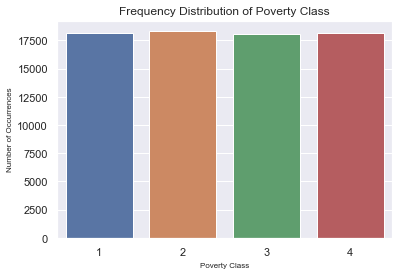

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
povertyClass_count = data2015['PovertyClass'].value_counts()
sns.set(style="darkgrid")
sns.barplot(povertyClass_count.index, povertyClass_count.values)
plt.title('Frequency Distribution of Poverty Class')
plt.ylabel('Number of Occurrences', fontsize=8)
plt.xlabel('Poverty Class', fontsize=8)
plt.show()


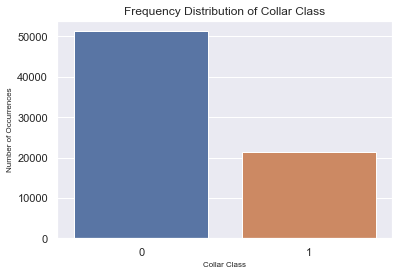

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
collarClass_count = data2015['CollarClass'].value_counts()
sns.set(style="darkgrid")
sns.barplot(collarClass_count.index, collarClass_count.values)
plt.title('Frequency Distribution of Collar Class')
plt.ylabel('Number of Occurrences', fontsize=8)
plt.xlabel('Collar Class', fontsize=8)
plt.show()


The last pre-processing step we took was to remove variables that are not needed/useful for analysis. 

We removed *Poverty* because it is the continuous version of our class variable, *Poverty Class*. We created percentage variables for *Citizen* and *Employed*, therefore we can remove the aggregate numerical versions. We also removed *TotalPop, Men,* and *Women* because they are also aggregate counts of the total population of that variable in the geographical line item. They were also deemed not useful for analysis by our EDA in Lab 1. We want all of our population counts to be percentages so they are on the same scale for each geographical area. This makes sure that the population size of the geographical area does not skew the model. 

There are four income variables in our data set: *Income, IncomeErr, IncomePerCap* and *IncomePerCapErr*. These are all highly correlated variables to each other and depict the same information in different ways. Therefore, since we do not want duplicate data we only want to use one for our model. Therefore, we took out *IncomeErr, IncomePerCap* and *IncomePerCapErr*, leaving just *Income* in our data set for model building. The *Income* variable depicts the median household income in USD for that geographical line item. 

We removed any geographically identifying variables from our data set so that our models would not train on location. This allows our model to be potentially run on any geographical area regardless of size and location to predict the *Poverty Class* in that area. The specific geographically identifying variables we removed are *CensusTract, County,* and *State*. 

In [5]:
#Remove variables that are not needed/useful for analysis.
#Remove aggregate numerical population count variables
del data2015['Poverty']
del data2015['TotalPop']
del data2015['Citizen']
del data2015['Men']
del data2015['Women']
del data2015['Employed']

#Remove income varaibles since we are using just Income
del data2015['IncomeErr']
del data2015['IncomePerCap']
del data2015['IncomePerCapErr']

#Remove geographically identifying varaibles
del data2015['State']
del data2015['County']
del data2015['CensusTract']


In addition, we removed the employment classification variables that make up our second task: *Collar Class*. These consist of the variables: *Professional, Office, Construction, Production, and Service*. These variables would be considered repetitive data, now that we have the *Collar Class* variable.

In [6]:
census_pc = data2015.copy()
del census_pc['CollarClass']

census_cc = data2015.copy()
del census_cc['PovertyClass']
del census_cc['Professional']
del census_cc['Service']
del census_cc['Office']
del census_cc['Construction']
del census_cc['Production']


### **1.2 Data Preparation Part 2: Final Data Set For Classification/Regression**

Now we have two final data sets *census_pc* and *census_cc* that will be used for classification/regression of our two tasks *Poverty Class* and *Collar Class* respectively. Below is a description of our newly created variables:

    Newly created variables:
       PovertyClass - Depicts the poverty category (Low, Below Average, Above Average, High) of the geographical line item. [census_pc]
       
      CollarClass - Depicts the binary representation of white and blue collar job functions (White Collar, Blue Collar). [census_cc]
      
      CitizenPercent - Depicts the percentage (0 - 100%) of U.S. citizens in that geographical line item. [census_pc, census_cc]
      
      EmployedPercent - Depicts the percentage (0 - 100%) of employed persons in that geographical line item. [census_pc, census_cc]

We can also see the variable representations of our final data set. Every variable is a float except for our two task variables variables; *PovertyClass* and *Collar Class* which are category variables. 

Now that we have our final data sets, we can move on to [*Section 2: Modeling and Evaluation*](https://colab.research.google.com/drive/1fBFJCL0AUtZc_Zygo4NwYrBjoWFGUErf#scrollTo=5fVFEAYQRx0O).

In [7]:
census_pc.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 72671 entries, 0 to 74000
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Hispanic         72671 non-null  float64 
 1   White            72671 non-null  float64 
 2   Black            72671 non-null  float64 
 3   Native           72671 non-null  float64 
 4   Asian            72671 non-null  float64 
 5   Pacific          72671 non-null  float64 
 6   Income           72671 non-null  float64 
 7   CitizenPercent   72671 non-null  float64 
 8   ChildPoverty     72671 non-null  float64 
 9   Professional     72671 non-null  float64 
 10  Service          72671 non-null  float64 
 11  Office           72671 non-null  float64 
 12  Construction     72671 non-null  float64 
 13  Production       72671 non-null  float64 
 14  Drive            72671 non-null  float64 
 15  Carpool          72671 non-null  float64 
 16  Transit          72671 non-null  float64

In [8]:
census_cc.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 72671 entries, 0 to 74000
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Hispanic         72671 non-null  float64 
 1   White            72671 non-null  float64 
 2   Black            72671 non-null  float64 
 3   Native           72671 non-null  float64 
 4   Asian            72671 non-null  float64 
 5   Pacific          72671 non-null  float64 
 6   Income           72671 non-null  float64 
 7   CitizenPercent   72671 non-null  float64 
 8   ChildPoverty     72671 non-null  float64 
 9   Drive            72671 non-null  float64 
 10  Carpool          72671 non-null  float64 
 11  Transit          72671 non-null  float64 
 12  Walk             72671 non-null  float64 
 13  OtherTransp      72671 non-null  float64 
 14  WorkAtHome       72671 non-null  float64 
 15  MeanCommute      72671 non-null  float64 
 16  PrivateWork      72671 non-null  float64

## **2. Modeling and Evaluation**

### **2.1 Modeling and Evaluation 1: Evaluation Metrics**

For our *Poverty Class* task we will be leveraging accuracy as our primary evaluation metric. This is the most appropriate for analyzing the results of the *Poverty Class* task models because we have a balanced dataset when it comes to the classes of this variable. Also, we are trying to correctly classify geographical areas of extreme poverty in the United States and accuracy would be the most important outcome for this classification task. Focusing on achieving the highest accuracy would allow our model to be used in a multitude of ways such as the allocation of government social relief funds, private/public investment, school funding, etc. We will discuss the specific use cases of our models in [*Section 3: Deployment*](https://colab.research.google.com/drive/1fBFJCL0AUtZc_Zygo4NwYrBjoWFGUErf#scrollTo=z39eg-L9SD5l).

For our *Collar Class* task we will be leveraging multiple evaluation metrics since we are dealing with an imbalanced dataset. The classification of *white collar* will occur more frequently, therefore we would want to test high precision (low false positives). Since the *blue collar* outcome will occur less frequently we will need to test high recall (low false negatives). Overall we will want our task to be modeled with high accuracy, for the same reasons as listed above. 
  - High precision
  - High recall
  - High accuracy

### **2.2 Modeling and Evaluation 2: Training/Test Split Method**

We have chosen to use a 10 fold stratified model as our method for validation. The 10 fold stratified cross-validation procedure is a slight deviation from the k-fold cross validation procedure, in that it creates folds while maintaining the percentage of samples for each class. This allows us to have all the benefits of a 10 fold cross-validation without the model accuracy issues we would come across with an unbalanced dataset(e.g. *Collar Class* cross-validation). With a 10 fold stratified model we will be creating 9 folds to train our model and the 10th fold will be used as our test set. This process will be repeated and each of the folds will have the opportunity to be used as the test set. The complete 10 models are fit and evaluated while the performance of the model is calculated as the mean of the total runs.

For our hyperparamter tuning we are using Grid Search. For this we created a seperate cross validation object that reduced the folds from 10 to 3. This was necessary as we ran across an issue of computing time and consequently computing power. We learned in the MiniLab that when running our grid search for tuning the hyperparameters of our model that it would result in hours, possibly days, to completion. Therefore we reduced these objects to 3 fold however maintained a 10 fold train test split of those hypertuned parameters. While this does mean our model could be improved on further, we feel that the 3 fold CV object has been sufficient for the needs of tuning our hyperparamters for each model.

In [230]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
import numpy as np

if 'PovertyClass' in census_pc:
    y_pc = census_pc['PovertyClass'].values # get the labels we want
    del census_pc['PovertyClass'] # get rid of the class label
    X_pc = census_pc.values # use everything else to predict! 
    
if 'CollarClass' in census_cc:
    y_cc = census_cc['CollarClass'].values # get the labels we want
    del census_cc['CollarClass'] # get rid of the class label
    X_cc = census_cc.values # use everything else to predict!  
    
num_cv_iterations = 10
num_instances = len(y_cc)
cv_object_GS = StratifiedKFold(n_splits=3,shuffle=True,random_state=13)
cv_object = StratifiedKFold(n_splits = num_cv_iterations, shuffle = True, random_state = 13)
print("Grid Search CV Object:")
print(cv_object_GS)
print("Model Evaluation CV Object:")
print(cv_object)


Grid Search CV Object:
StratifiedKFold(n_splits=3, random_state=13, shuffle=True)
Model Evaluation CV Object:
StratifiedKFold(n_splits=10, random_state=13, shuffle=True)


We used Standard Scaler to scale each of the two data sets we are working with for each task:

In [11]:
from sklearn.preprocessing import StandardScaler
# Scale the data
ss = StandardScaler()
X_pc = ss.fit_transform(X_pc)
X_cc = ss.fit_transform(X_cc)


### **2.3 Modeling and Evaluation 3: Creation of 3 Different Models**

Throughout this report we need to fit and predict our models and generate various plots and output. To cut down on repetition we created four helper functions: FitAndPredictMulti(), FitAndPredictBinary(), ROC(), ROCMulti() and ConfInt95().

In [252]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Defining Global Variables 
cm_dict = {"KNN_pc":[], "KNN_cc":[], "Random Forest_pc": [], "Random Forest-cc":[],
          "Logistic Regression_pc":[], "Logistic Regression_cc":[]}

def FitAndPredictMulti(classifierEstimator, X, y, cv, modelType):
    from sklearn.model_selection import cross_val_predict
    from sklearn.metrics import confusion_matrix
    from sklearn import metrics as mt
    
    y_hat = cross_val_predict(classifierEstimator, X, y, cv=cv)
    acc = mt.accuracy_score(y,y_hat)
    
    print("Model Performance:")
    print("*******************************************************************************************************************")
    print("The accuracy of this",num_cv_iterations,"- fold, stratified cross validation",modelType,"model is:",round((acc*100),2),"%")
    print("")
    print("The confusion matrix for this",num_cv_iterations,"- fold, stratified cross validation",modelType,"model can be seen below.")
    print("")
    cm = confusion_matrix(y, y_hat)   
    cm_dict[str(modelType + "_pc")] = cm
    plt.figure(figsize=(16,10))
    sns.heatmap(cm, annot=True, fmt='g',cmap = 'Blues',xticklabels=['Low','Below-Average','Above Average','High'], yticklabels=['Low','Below-Average','Above-Average','High']); 
    plt.ylabel("Predicted")
    plt.xlabel("Actual")
    print("Model Run Time: ")


def FitAndPredictBinary(classifierEstimator, X, y, cv, modelType):
    from sklearn.model_selection import cross_val_predict
    from sklearn.metrics import roc_curve, roc_auc_score
    from sklearn.metrics import confusion_matrix
    from sklearn import metrics as mt
    from sklearn.metrics import auc
    from sklearn.metrics import plot_roc_curve
    import numpy as np
    import matplotlib.pyplot as plt
    
    y_hat = cross_val_predict(classifierEstimator, X, y, cv=cv)
    acc = mt.accuracy_score(y,y_hat)
    pre = mt.precision_score(y,y_hat)
    rec = mt.recall_score(y,y_hat)
    
    print("Model Performance:")
    print("*******************************************************************************************************************")
    print("The accuracy of this",num_cv_iterations,"- fold, stratified cross validation",modelType,"model is:",round((acc*100),2),"%")
    print("The precision of this",num_cv_iterations,"- fold, stratified cross validation",modelType,"model is:",round((pre*100),2),"%")
    print("The recall of this",num_cv_iterations,"- fold, stratified cross validation",modelType,"model is:",round((rec*100),2),"%")
    print("")
    print("The confusion matrix for this",num_cv_iterations,"- fold, stratified cross validation",modelType,"model can be seen below.")
    print("")
    cm = confusion_matrix(y, y_hat)
    cm_dict[str(modelType + "_cc")] = cm
    plt.figure(figsize=(16,10))
    sns.heatmap(cm, annot=True, fmt='g',cmap = 'Blues',xticklabels=['White Collar','Blue Collar'], yticklabels=['White Collar','Blue Collar']); 
    plt.ylabel("Predicted")
    plt.xlabel("Actual")
    
    print("")
    print("The ROC for the ",num_cv_iterations,"- fold, stratified cross validation",modelType,"model can be seen below.")
    print("")
    
    cv = cv_object
    classifier = classifierEstimator

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    for i, (train, test) in enumerate(cv.split(X_cc, y_cc)):
        classifier.fit(X_cc[train], y_cc[train])
        viz = plot_roc_curve(classifier, X_cc[test], y_cc[test],
                             name='ROC fold {}'.format(i),
                             alpha=0.3, lw=2, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=4, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Receiver operating characteristic example")
    ax.legend(loc="lower right")
    fig.set_size_inches(16,10)
    plt.show()    
    print("Model Run Time: ")
    
def ROC(KNNClassifier, RFClassifier, LRClassifier, X, y, cv):
    from sklearn.model_selection import cross_val_predict
    from sklearn.metrics import roc_curve, roc_auc_score
    from sklearn.metrics import confusion_matrix
    from sklearn import metrics as mt
    from sklearn.metrics import auc
    from sklearn.metrics import plot_roc_curve
    import numpy as np
    import matplotlib.pyplot as plt
    
    y_hat_knn = cross_val_predict(KNNClassifier, X, y, cv=cv)
    print("KNN Curve Generated")
    y_hat_rf = cross_val_predict(RFClassifier, X, y, cv=cv)
    print("RF Curve Generated")
    y_hat_lr = cross_val_predict(LRClassifier, X, y, cv=cv)
    print("LR Curve Generated")
    
    fpr_knn, tpr_knn, _ = mt.roc_curve(y, y_hat_knn)
    roc_auc_knn = mt.auc(fpr_knn, tpr_knn)
    
    fpr_rf, tpr_rf, _ = mt.roc_curve(y, y_hat_rf)
    roc_auc_rf = mt.auc(fpr_rf, tpr_rf)
    
    fpr_lr, tpr_lr, _ = mt.roc_curve(y, y_hat_lr)
    roc_auc_lr = mt.auc(fpr_lr, tpr_lr)
    
    plt.figure()
    plt.plot(fpr_knn, tpr_knn, color='blue',
         lw=2, label='K-Nearest Neighbours (area = %0.2f)' % roc_auc_knn)
    plt.plot(fpr_rf, tpr_rf, color='red',
         lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)
    plt.plot(fpr_lr, tpr_lr, color='green',
         lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

def ROCMulti(KNNClassifier, RFClassifier, LRClassifier, X, y, cv):
    from sklearn.model_selection import cross_val_predict
    from sklearn.metrics import roc_curve, roc_auc_score
    from sklearn.metrics import confusion_matrix
    from sklearn import metrics as mt
    from sklearn.metrics import auc
    from sklearn.metrics import plot_roc_curve
    import numpy as np
    import matplotlib.pyplot as plt
    
    y_hat_knn = cross_val_predict(KNNClassifier, X, y, cv=cv)
    print("KNN Curve Generated")
    y_hat_rf = cross_val_predict(RFClassifier, X, y, cv=cv)
    print("RF Curve Generated")
    y_hat_lr = cross_val_predict(LRClassifier, X, y, cv=cv)
    print("LR Curve Generated")
    
    for i in np.unique(y):
        fpr_knn[i], tpr_knn[i], _ = mt.roc_curve(y, y_hat_knn[:, i], pos_label=i)
        roc_auc_knn[i] = mt.auc(fpr_knn[i], tpr_knn[i])
    
    for i in np.unique(y):
        fpr_rf[i], tpr_rf[i], _ = mt.roc_curve(y, y_hat_rf[:, i], pos_label=i)
        roc_auc_rf[i] = mt.auc(fpr_rf[i], tpr_rf[i])
    
    for i in np.unique(y):
        fpr_lr[i], tpr_lr[i], _ = mt.roc_curve(y, y_hat_lr[:, i], pos_label=i)
        roc_auc_lr[i] = mt.auc(fpr_lr[i], tpr_lr[i])

    for i in np.random.permutation(43)[0:12]:
        plt.plot(fpr_knn[i], tpr_knn[i], label='KNN'
                                   ''.format(i, sum(y==i), roc_auc_knn[i]))
        plt.plot(fpr_rf[i], tpr_rf[i], label='Random Forest'
                                   ''.format(i, sum(y==i), roc_auc_knn[i]))
        plt.plot(fpr_lr[i], tpr_lr[i], label='Logistic Regression'
                                   ''.format(i, sum(y==i), roc_auc_knn[i]))

        plt.legend(loc="lower right")  
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.show()    
    
def ConfInt95(KNNClassifier, RFClassifier, LRClassifier, X, y, cv):
    from sklearn.model_selection import cross_val_score
    
    acc_knn = cross_val_score(KNNClassifier, X, y=y, cv=cv)
    print("KNN Accuracy Generated")
    acc_rf = cross_val_score(RFClassifier, X, y=y, cv=cv)
    print("RF Accuracy Generated")
    acc_lr = cross_val_score(LRClassifier, X, y=y, cv=cv)
    print("LR Accuracy Generated")
    
    t = 2.26 / np.sqrt(10)
    
    print("95% Confidence Intervals Between KNN and Random Forest:")
    e = (1-acc_knn)-(1-acc_rf)
    stdtot = np.std(e)
    
    dbar = np.mean(e)
    print ('Range of:', dbar-t*stdtot,dbar+t*stdtot )
    print (np.mean(acc_knn), np.mean(acc_rf))
    
    print("95% Confidence Intervals Between KNN and Logistic Regression:")
    e = (1-acc_knn)-(1-acc_lr)
    stdtot = np.std(e)
    
    dbar = np.mean(e)
    print ('Range of:', dbar-t*stdtot,dbar+t*stdtot )
    print (np.mean(acc_knn), np.mean(acc_lr))
    
    print("95% Confidence Intervals Between Random Forest and Logistic Regression:")
    e = (1-acc_rf)-(1-acc_lr)
    stdtot = np.std(e)
    
    dbar = np.mean(e)
    print ('Range of:', dbar-t*stdtot,dbar+t*stdtot )
    print (np.mean(acc_rf), np.mean(acc_lr))
    

### **2.3.1 Model 1 - KNN**

##### **2.3.1.1 KNN To Classify Poverty Class**

We used Grid Search to tune the hyperparameters of our KNN Model to predict Poverty Class.

In [73]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
KNN_pcEstimator = KNeighborsClassifier()

KNN_pcparameters = { 'n_neighbors':[3, 9, 27, 261, 269, 275]
                  ,'weights': ['uniform', 'distance']
                  ,'algorithm': ['ball_tree', 'kd_tree', 'brute']
                  ,'leaf_size': [5, 10, 20, 40, 80]
                }

KNN_pcGridSearch = GridSearchCV(estimator=KNN_pcEstimator
                   , n_jobs=10 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=KNN_pcparameters
                   , cv=cv_object_GS # KFolds = 3
                   , scoring='accuracy')

KNN_pcGridSearch.fit(X_pc,y_pc)


Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed: 17.1min
/Users/reagan/opt/anaconda3/envs/MachineLearningI/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed: 98.1min
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed: 550.5min
[Parallel(n_jobs=10)]: Done 540 out of 540 | elapsed: 572.4min finished


CPU times: user 10.4 s, sys: 3.4 s, total: 13.8 s
Wall time: 9h 32min 29s


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=13, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=10,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [5, 10, 20, 40, 80],
                         'n_neighbors': [3, 9, 27, 261, 269, 275],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

The best parameters for our model were:

In [74]:
KNN_pcGridSearch.best_estimator_


KNeighborsClassifier(algorithm='ball_tree', leaf_size=5, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='distance')

Model Performance:
*******************************************************************************************************************
The accuracy of this 10 - fold, stratified cross validation KNN model is: 71.35 %

The confusion matrix for this 10 - fold, stratified cross validation KNN model can be seen below.

Model Run Time: 
CPU times: user 9min, sys: 11.9 s, total: 9min 11s
Wall time: 9min 24s


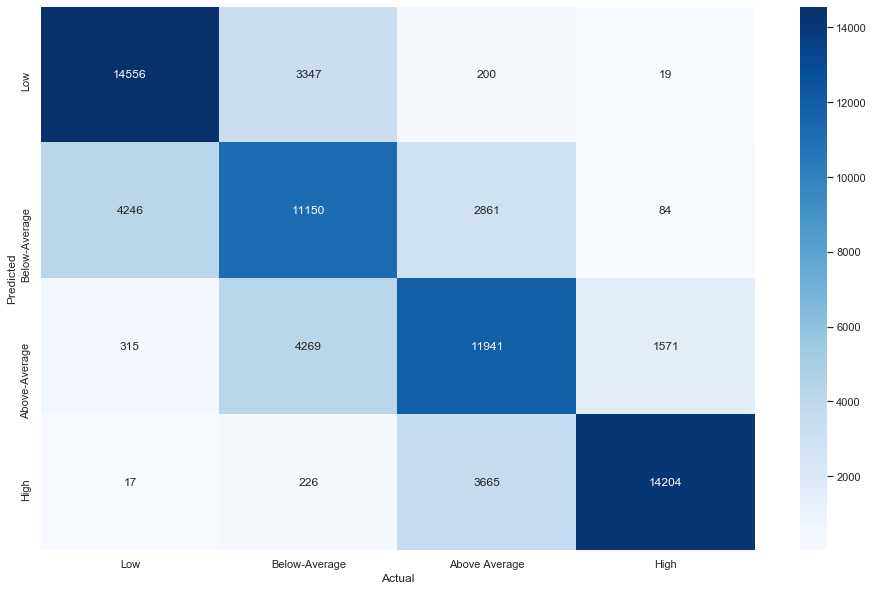

In [152]:
%%time
modelType = 'KNN'
KNN_pcBestParameters = KNN_pcGridSearch.best_estimator_
FitAndPredictMulti(KNN_pcBestParameters, X_pc, y_pc, cv_object, modelType)


##### **2.3.1.2 KNN To Classify Collar Class**

We used Grid Search to tune the hyperparameters of our KNN Model to predict Collar Class.

In [76]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
KNN_ccEstimator = KNeighborsClassifier()

KNN_ccparameters = { 'n_neighbors':[3, 9, 27, 261, 269, 275]
                  ,'weights': ['uniform', 'distance']
                  ,'algorithm': ['ball_tree', 'kd_tree', 'brute']
                  ,'leaf_size': [5, 10, 20, 40, 80]
                }

KNN_ccGridSearch = GridSearchCV(estimator=KNN_ccEstimator
                   , n_jobs=10 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=KNN_ccparameters
                   , cv=cv_object_GS # KFolds = 3
                   , scoring='accuracy')

KNN_ccGridSearch.fit(X_cc,y_cc)


Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed: 14.8min
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed: 83.5min
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed: 170.7min
[Parallel(n_jobs=10)]: Done 540 out of 540 | elapsed: 195.4min finished


CPU times: user 9.61 s, sys: 3.84 s, total: 13.5 s
Wall time: 3h 15min 33s


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=13, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=10,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [5, 10, 20, 40, 80],
                         'n_neighbors': [3, 9, 27, 261, 269, 275],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

The best parameters for our model were:

In [77]:
KNN_ccGridSearch.best_estimator_


KNeighborsClassifier(algorithm='ball_tree', leaf_size=5, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='distance')

Model Performance:
*******************************************************************************************************************
The accuracy of this 10 - fold, stratified cross validation KNN model is: 82.66 %
The precision of this 10 - fold, stratified cross validation KNN model is: 74.29 %
The recall of this 10 - fold, stratified cross validation KNN model is: 62.77 %

The confusion matrix for this 10 - fold, stratified cross validation KNN model can be seen below.


The ROC for the  10 - fold, stratified cross validation KNN model can be seen below.



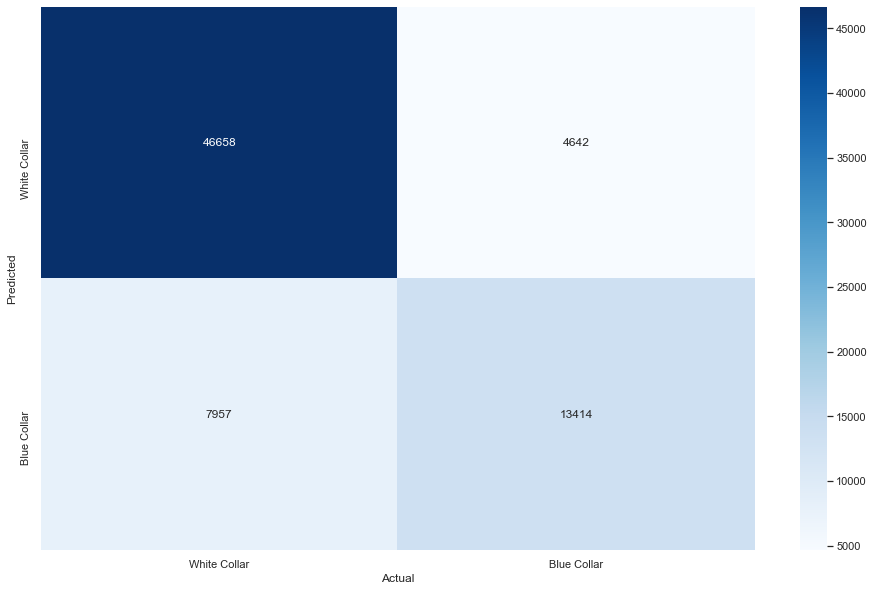

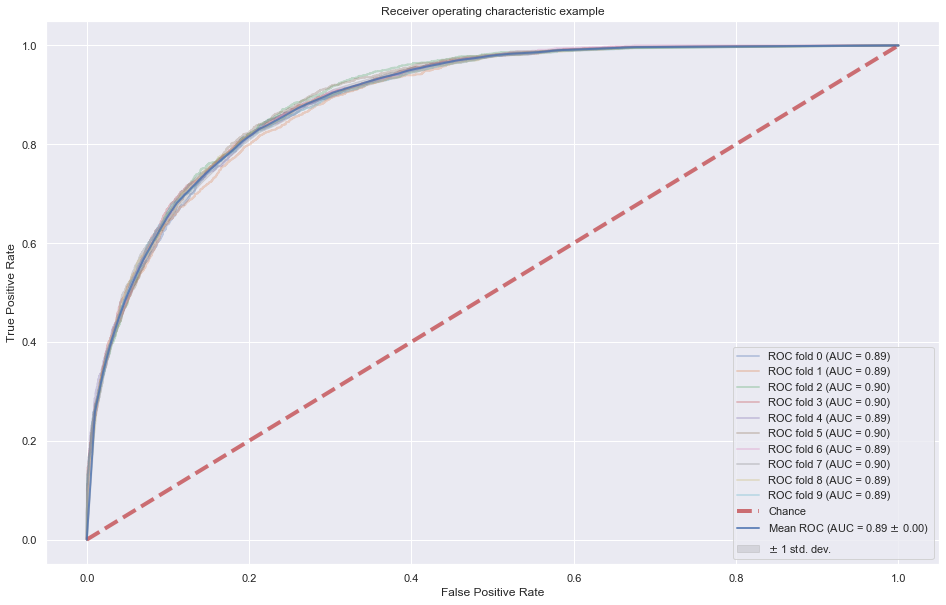

Model Run Time: 
CPU times: user 13min 19s, sys: 11.7 s, total: 13min 31s
Wall time: 13min 42s


In [153]:
%%time
modelType = 'KNN'
KNN_ccBestParameters = KNN_ccGridSearch.best_estimator_
FitAndPredictBinary(KNN_ccBestParameters, X_cc, y_cc, cv_object, modelType)


### **2.3.2 Model 2 - Random Forest**

##### **2.3.2.1 Random Forest To Classify Poverty Class**

We used Grid Search to tune the hyperparameters of our Random Forest Model to predict Poverty Class.

In [19]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
RF_pcEstimator = RandomForestClassifier()

RF_pcparameters = { 'n_estimators':[50, 100, 200, 400]
                ,'max_depth': ['None', 25, 50, 100, 200]
                ,'criterion': ['gini', 'entropy']
                ,'min_samples_split': [2, 4, 16, 64, 256]
                ,'min_samples_leaf': [1, 4, 16, 64, 128]
                ,'random_state': [13]
               }

RF_pcGridSearch = GridSearchCV(estimator=RF_pcEstimator
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=RF_pcparameters
                   , cv=cv_object_GS # KFolds = 3
                   , scoring='accuracy')

RF_pcGridSearch.fit(X_pc,y_pc)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 342 tasks      | elapsed:  4.1min
[Parallel(n_jobs=8)]: Done 594 tasks      | elapsed: 20.3min
[Parallel(n_jobs=8)]: Done 944 tasks      | elapsed: 48.2min
[Parallel(n_jobs=8)]: Done 1394 tasks      | elapsed: 85.8min
[Parallel(n_jobs=8)]: Done 1944 tasks      | elapsed: 106.2min
[Parallel(n_jobs=8)]: Done 2594 tasks      | elapsed: 158.6min
[Parallel(n_jobs=8)]: Done 3000 out of 3000 | elapsed: 190.0min finished


CPU times: user 1min 43s, sys: 1.67 s, total: 1min 45s
Wall time: 3h 11min 36s


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=13, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min...
                                              random_state=None, verbose=0,
                                              warm_start=False),
   

The best parameters for our model were:

In [20]:
#Diplay the top model parameters
RF_pcGridSearch.best_estimator_


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

Model Performance:
*******************************************************************************************************************
The accuracy of this 10 - fold, stratified cross validation Random Forest model is: 81.0 %

The confusion matrix for this 10 - fold, stratified cross validation Random Forest model can be seen below.

Model Run Time: 
CPU times: user 13min 52s, sys: 4.85 s, total: 13min 57s
Wall time: 13min 58s


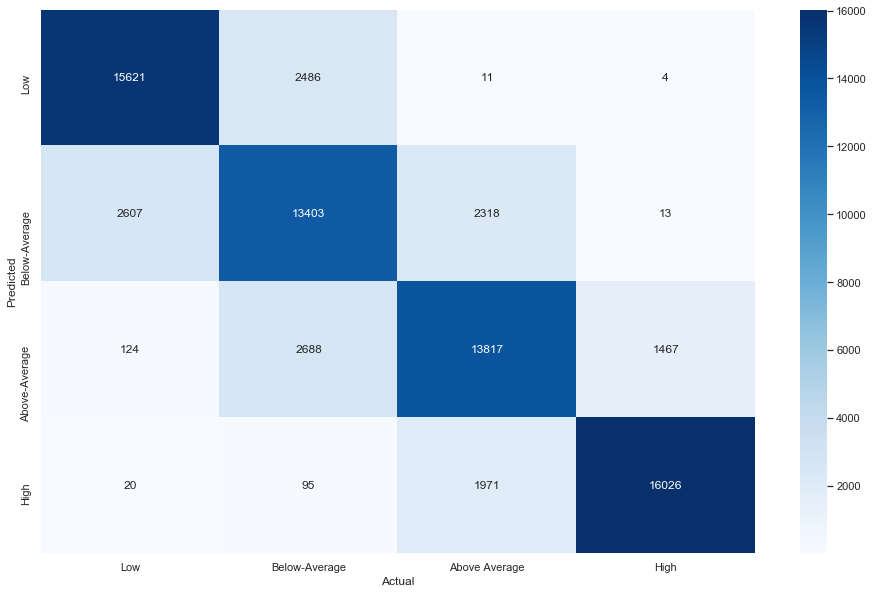

In [154]:
%%time
modelType = 'Random Forest'
RF_pcBestParameters = RF_pcGridSearch.best_estimator_
FitAndPredictMulti(RF_pcBestParameters, X_pc, y_pc, cv_object, modelType)


##### **2.3.2.2 Random Forest To Classify Collar Class**

We used Grid Search to tune the hyperparameters of our Random Forest Model to predict Collar Class.

In [22]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
RF_ccEstimator = RandomForestClassifier()

RF_ccparameters = { 'n_estimators':[50, 100, 200, 400]
                ,'max_depth': ['None', 25, 50, 100, 200]
                ,'criterion': ['gini', 'entropy']
                ,'min_samples_split': [2, 4, 16, 64, 256]
                ,'min_samples_leaf': [1, 4, 16, 64, 128]
                ,'random_state': [13]
               }

RF_ccGridSearch = GridSearchCV(estimator=RF_ccEstimator
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=RF_ccparameters
                   , cv=cv_object_GS # KFolds = 3
                   , scoring='accuracy')

RF_ccGridSearch.fit(X_cc,y_cc)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    6.6s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  9.1min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed: 29.4min
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed: 54.9min
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed: 70.1min
[Parallel(n_jobs=8)]: Done 2434 tasks      | elapsed: 109.1min
[Parallel(n_jobs=8)]: Done 3000 out of 3000 | elapsed: 143.5min finished


CPU times: user 1min 18s, sys: 1.65 s, total: 1min 20s
Wall time: 2h 24min 40s


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=13, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min...
                                              random_state=None, verbose=0,
                                              warm_start=False),
   

The best parameters for our model were:

In [23]:
#Diplay the top model parameters
RF_ccGridSearch.best_estimator_


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

Model Performance:
*******************************************************************************************************************
The accuracy of this 10 - fold, stratified cross validation Random Forest model is: 83.79 %
The precision of this 10 - fold, stratified cross validation Random Forest model is: 75.88 %
The recall of this 10 - fold, stratified cross validation Random Forest model is: 65.79 %

The confusion matrix for this 10 - fold, stratified cross validation Random Forest model can be seen below.


The ROC for the  10 - fold, stratified cross validation Random Forest model can be seen below.



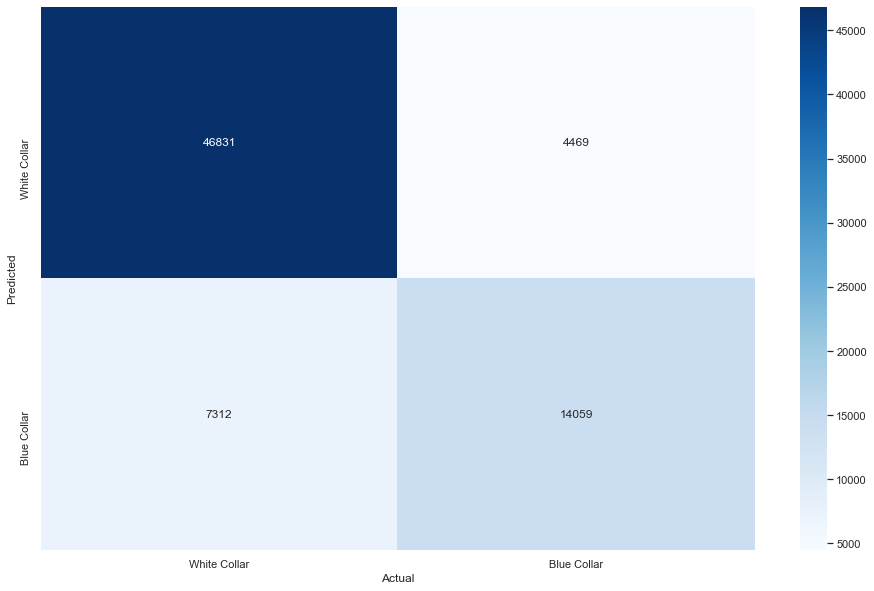

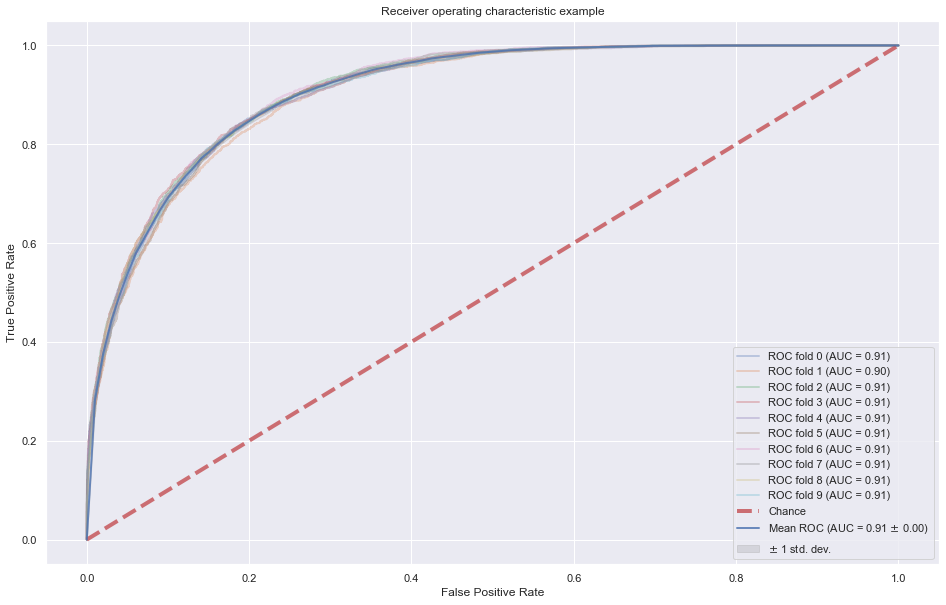

Model Run Time: 
CPU times: user 19min 29s, sys: 6.65 s, total: 19min 36s
Wall time: 19min 37s


In [155]:
%%time
modelType = 'Random Forest'
RF_ccBestParameters = RF_ccGridSearch.best_estimator_
FitAndPredictBinary(RF_ccBestParameters, X_cc, y_cc, cv_object, modelType)


### **2.3.3 Model 3 - Logistic Regression**

##### **2.3.3.1 Logistic Regression To Classify Poverty Class**

We used Grid Search to tune the hyperparameters of our Logistic Regression Model to predict Poverty Class.

In [13]:
%%time
from sklearn.linear_model import LogisticRegression
LR_pcEstimator = LogisticRegression()

LR_pcparameters = { 'penalty':['l1','elasticnet','l2']
              ,'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
              ,'class_weight': ['balanced','none']
              ,'solver': ['lbfgs','saga','newton-cg','liblinear']
              ,'multi_class': ['multinomial']
              ,'max_iter':[500, 2500, 5000, 10000]
              ,'random_state': [13]
             }

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
LR_pcGridSearch = GridSearchCV(estimator=LR_pcEstimator
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=LR_pcparameters
                   , cv=cv_object_GS # KFolds = 3
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
LR_pcGridSearch.fit(X_pc,y_pc)

Fitting 3 folds for each of 672 candidates, totalling 2016 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=8)]: Done 189 tasks      | elapsed:   13.4s
[Parallel(n_jobs=8)]: Done 730 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done 1288 tasks      | elapsed:  5.5min
[Parallel(n_jobs=8)]: Done 1816 tasks      | elapsed:  9.4min
[Parallel(n_jobs=8)]: Done 2016 out of 2016 | elapsed: 10.8min finished


CPU times: user 18.6 s, sys: 681 ms, total: 19.3 s
Wall time: 11min 2s


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=13, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=8,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': ['balanced', 'none'],
                         'max_iter': [500, 2500, 5000, 10000],
                         'multi_class': ['multinomial'],
                         'penalty'

The best parameters for our model were:

In [14]:
#Diplay the top model parameters
LR_pcGridSearch.best_estimator_

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=500, multi_class='multinomial', n_jobs=None,
                   penalty='l1', random_state=13, solver='saga', tol=0.0001,
                   verbose=0, warm_start=False)

Model Performance:
*******************************************************************************************************************
The accuracy of this 10 - fold, stratified cross validation Logistic Regression model is: 79.5 %

The confusion matrix for this 10 - fold, stratified cross validation Logistic Regression model can be seen below.

Model Run Time: 
CPU times: user 2min 4s, sys: 1.18 s, total: 2min 6s
Wall time: 2min


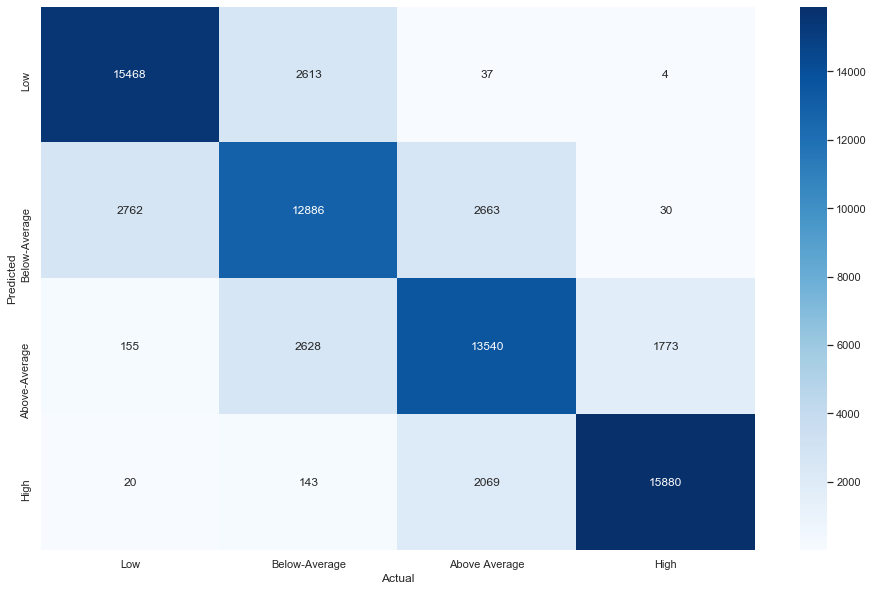

In [156]:
%%time
modelType = 'Logistic Regression'
LR_pcBestParameters = LR_pcGridSearch.best_estimator_
FitAndPredictMulti(LR_pcBestParameters, X_pc, y_pc, cv_object, modelType)

##### **2.3.3.2 Logistic Regression To Classify Collar Class**

We used Grid Search to tune the hyperparameters of our Logistic Regression Model to predict Collar Class.

In [16]:
%%time
from sklearn.linear_model import LogisticRegression
LR_ccEstimator = LogisticRegression()

LR_ccparameters = { 'penalty':['l1','elasticnet','l2']
              ,'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
              ,'class_weight': ['balanced','none']
              ,'solver': ['lbfgs','saga','newton-cg','liblinear']
              ,'multi_class': ['ovr']
              ,'max_iter':[500, 2500, 5000, 10000]
              ,'random_state': [13]
             }

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
LR_ccGridSearch = GridSearchCV(estimator=LR_ccEstimator
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=LR_ccparameters
                   , cv=cv_object_GS # KFolds = 3
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
LR_ccGridSearch.fit(X_cc,y_cc)

Fitting 3 folds for each of 672 candidates, totalling 2016 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:   14.6s
[Parallel(n_jobs=8)]: Done 602 tasks      | elapsed:   35.1s
[Parallel(n_jobs=8)]: Done 952 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done 1402 tasks      | elapsed:  6.3min
[Parallel(n_jobs=8)]: Done 1952 tasks      | elapsed: 10.8min


CPU times: user 6.62 s, sys: 755 ms, total: 7.38 s
Wall time: 11min 30s


[Parallel(n_jobs=8)]: Done 2016 out of 2016 | elapsed: 11.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=13, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=8,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': ['balanced', 'none'],
                         'max_iter': [500, 2500, 5000, 10000],
                         'multi_class': ['ovr'],
                         'penalty': ['l1',

The best parameters for our model were:

In [17]:
#Diplay the top model parameters
LR_ccGridSearch.best_estimator_


LogisticRegression(C=0.1, class_weight='none', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=13, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Model Performance:
*******************************************************************************************************************
The accuracy of this 10 - fold, stratified cross validation Logistic Regression model is: 82.01 %
The precision of this 10 - fold, stratified cross validation Logistic Regression model is: 73.18 %
The recall of this 10 - fold, stratified cross validation Logistic Regression model is: 61.26 %

The confusion matrix for this 10 - fold, stratified cross validation Logistic Regression model can be seen below.


The ROC for the  10 - fold, stratified cross validation Logistic Regression model can be seen below.



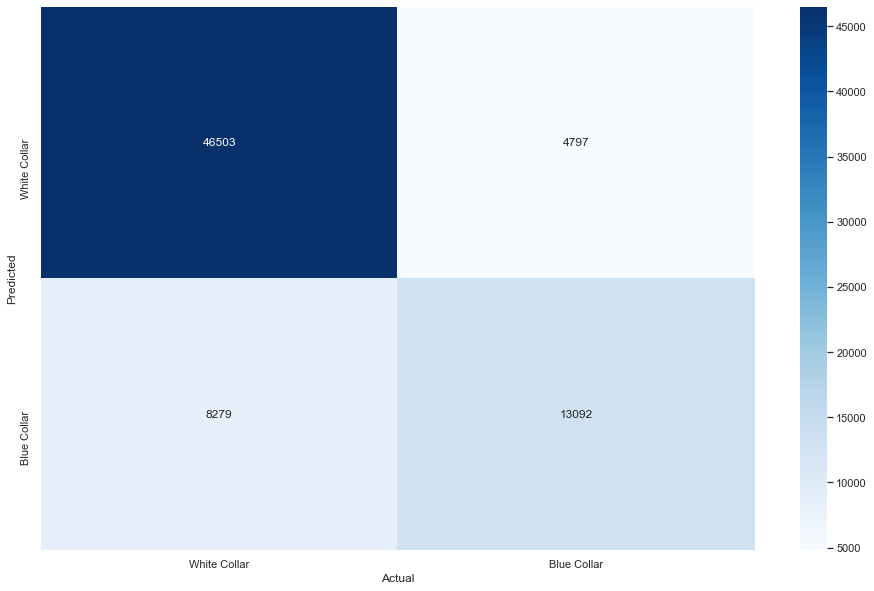

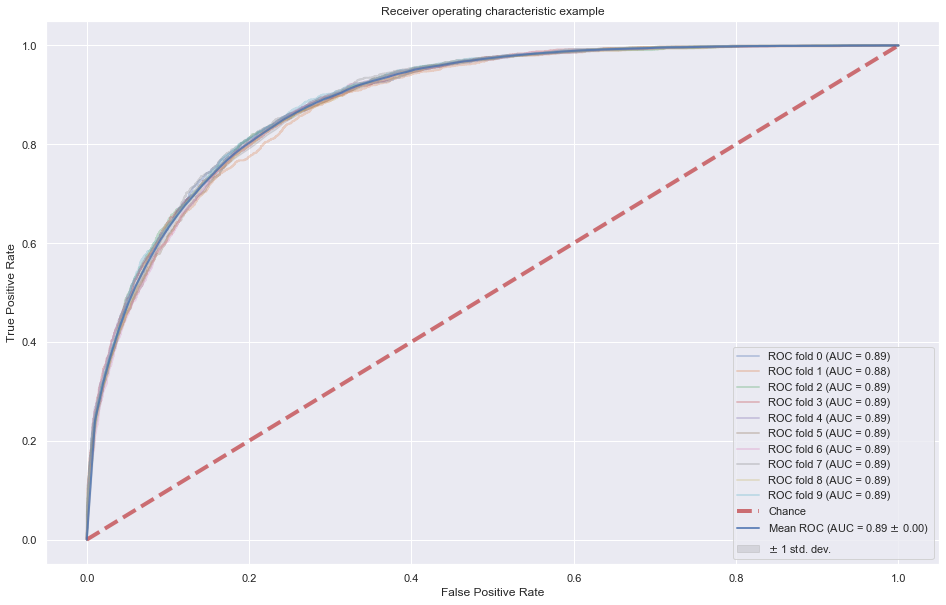

Model Run Time: 
CPU times: user 9.65 s, sys: 1.04 s, total: 10.7 s
Wall time: 2.97 s


In [157]:
%%time
modelType = 'Logistic Regression'
LR_ccBestParameters = LR_ccGridSearch.best_estimator_
FitAndPredictBinary(LR_ccBestParameters, X_cc, y_cc, cv_object, modelType)

### **2.4 Modeling and Evaluation 4: Analyze Results**

|  Class Variable  |  Model                 |  Accuracy  |    Time    |
|------------------|------------------------|------------|------------|
| PovertyClass     |  KNN                   |71.35 %      |9min 24s    |
| PovertyClass     |  Random Forest         |81.00 %            |13m 58s            |
| PovertyClass     |  Logistic Regression   |79.50 %      |2min 0s   |

|Class Variable|      Model                 |Precision|Recall|Accuracy|Time|
|------------------|------------------------|---------|--------|--------|----|
| CollarClass      |  KNN                   |74.29 %  |62.77 % |82.66 % |13min 42s|    
| CollarClass      |  Random Forest         |75.88 %  |65.79 % |83.79 % |19min 37s    |
| CollarClass      |  Logistic Regression   |73.18 % |61.26 % |82.01 % |2.97s    |

In order to best understand our results so far, we analyze Poverty Class and Collar class separately as two separate tasks. But there will be similar approaches and visualizations. For each task we begin analyzing our results by discussing each of our model approaches and their respective confusion matrices as heat maps. These model approaches include a KNN, Random Forest and Logistic Regression. This allows us to take a close look at where each of these top models may fall on our spectrum of classification. We also outline the best parameters each of our grid searches returned for each of our best model approaches. 
 
Afterwards we scale back into a wider view to compare overall accuracies, including precision and recall for our Collar classification task, between each of our models overall and accuracy by class specifically. 

We created a cm_dict (shown below). This is a dictionary of confusion matricies for each optimized model for each task. We will use this as we analyze the results of our models. 

In [233]:
cm_dict = {'KNN_pc': [[14556,  3347,   200,    19],
        [ 4246, 11150,  2861,    84],
        [  315,  4269, 11941,  1571],
        [   17,   226,  3665, 14204]],
 'KNN_cc': [[46658,  4642],
        [ 7957, 13414]],
 'Random Forest_pc': [[15621,  2486,    11,     4],
        [ 2607, 13403,  2318,    13],
        [  124,  2688, 13817,  1467],
        [   20,    95,  1971, 16026]],
 'Logistic Regression_pc': [[15468,  2613,    37,     4],
        [ 2762, 12886,  2663,    30],
        [  155,  2628, 13540,  1773],
        [   20,   143,  2069, 15880]],
 'Logistic Regression_cc': [[46503,  4797],
        [ 8279, 13092]],
 'Random Forest_cc': [[46831,  4469],
        [ 7312, 14059]]}


### **2.4.1 Poverty Classification Task**

We predicted Poverty Class with three model approaches KNN, Random Forest, and Logistic Regression. Each of these models used were our best version of the model for our Poverty Class data set. 

#### Poverty Class - KNN

First we will examine the KNN approach and best results. Our KNN model used the parameters listed below. This was determined from an extensive grid search using 180 candidates with three fold cross validation. We found through our grid search parameter optimization that a k of 27 was ideal while using a ball tree KNN algorithm. Altogether this resulted in an accuracy of 71.35%, the best we obtained for predicting poverty class with a KNN approach. 

In [198]:
#KNN Best Model for PC
print(KNN_pcBestParameters)


KNeighborsClassifier(algorithm='ball_tree', leaf_size=5, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='distance')


Below you can see the overall and class specific accuracies by percentage and overall count. We can see overall we have an 71.35% accuracy. However these accuracies change by class. Overall this model is better at predicting our outlier classes, both high and low poverty. We know due to our poverty class split our classes are nearly perfectly balanced, so it stands out that both high and low poverty classified about fourteen thousand instances correctly where our middle classes; above average and below average poverty were classified correctly around eleven thousand instances in total. 


Text(0.5, 66.5, 'Actual')

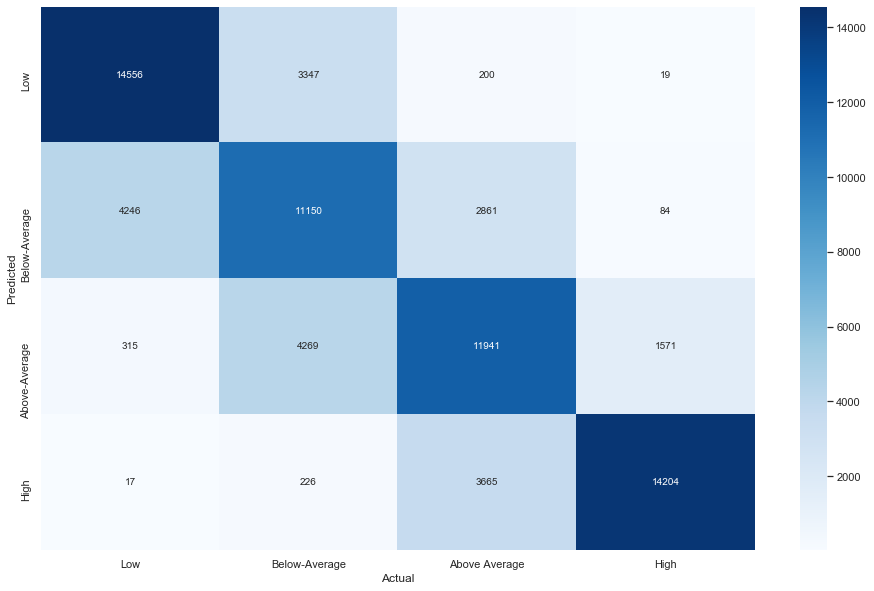

In [199]:
cm = cm_dict["KNN_pc"]
plt.figure(figsize=(16,10))
sns.heatmap(cm, annot=True, fmt='g',cmap = 'Blues',xticklabels=['Low','Below-Average','Above Average','High'], yticklabels=['Low','Below-Average','Above-Average','High']); 
plt.ylabel("Predicted")
plt.xlabel("Actual")


#### Poverty Class - Random Forest

Our next approach was to use a random forest decision tree classifier. AFter an extensive grid search of 1000 random forest candidates we have our best estimated model parameters below. We have limited our depth to 25, n_estimators to 400 and our criterion to entropy. We also have a small minimum samples per leaf and minimum samples to split given the size of our dataset. There is some potential to potentially overfit. 

In [200]:
print(RF_pcBestParameters)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)


However as we see our accuracy heat map below we have a stronger accuracy than our previous KNN approach with an overall accuracy of 81%. Overall accuracy is much better with this model. We can note the same issue here as in the KNN model, where our inner classes show smaller amounts of accurate classifications than our outer categories. However, each category seems to have seen about 2000 additional instances correctly classified overall. This indicates that we have not sacrificed any one category for an increase in accuracy from our KNN model approach. 

Text(0.5, 66.5, 'Actual')

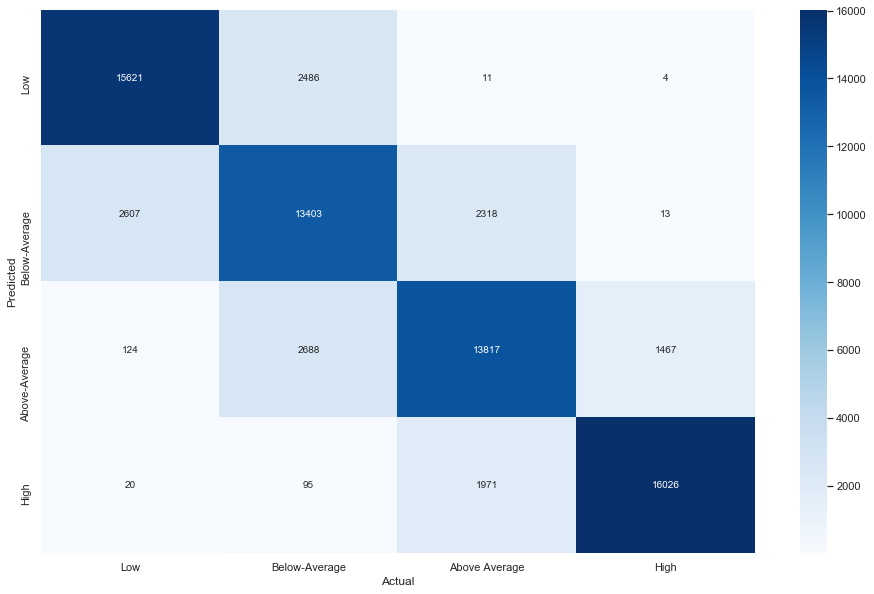

In [201]:
cm = cm_dict["Random Forest_pc"]
plt.figure(figsize=(16,10))
sns.heatmap(cm, annot=True, fmt='g',cmap = 'Blues',xticklabels=['Low','Below-Average','Above Average','High'], yticklabels=['Low','Below-Average','Above-Average','High']); 
plt.ylabel("Predicted")
plt.xlabel("Actual")

#### Poverty Class - Logistic Regression

Our final model approach is logistic regression. We found this to be our fastest model by far. However it fell below Random Forest in overall accuracy with 79.5% best accuracy. Our best set of Logistic Regression parameters are laid out below. Here we see a multiple class approach of multinomial, a solver approach of saga, and a few other instances of parameters that included achieve our best Logistic regression classifier for classifying poverty class. 

In [202]:
print(LR_pcBestParameters)


LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=500, multi_class='multinomial', n_jobs=None,
                   penalty='l1', random_state=13, solver='saga', tol=0.0001,
                   verbose=0, warm_start=False)


Finally below we can see our heat map confusion matrix. Like previous model approaches, our middle classes, above average and below average poverty are misclassified as a higher rate than low and high poverty. 

Text(0.5, 66.5, 'Actual')

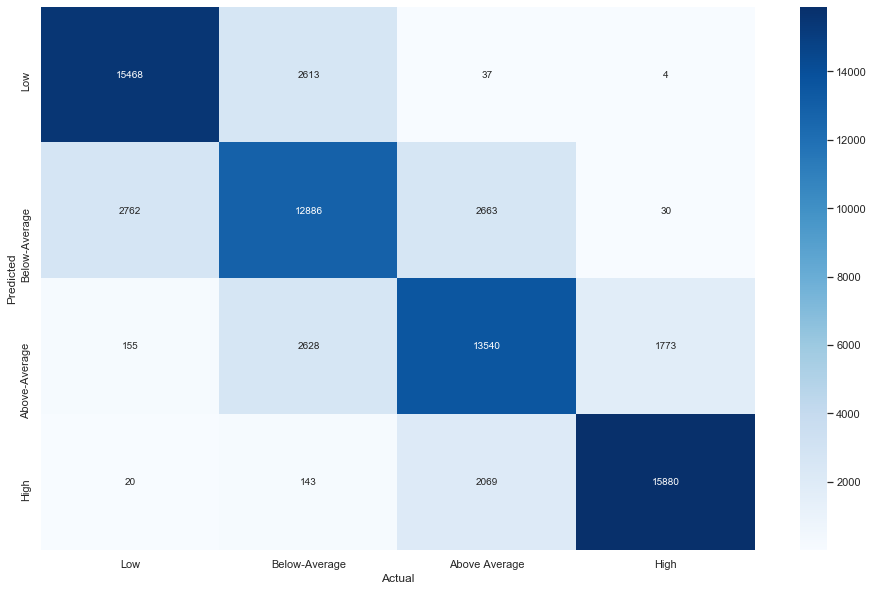

In [203]:
cm = cm_dict["Logistic Regression_pc"]
plt.figure(figsize=(16,10))
sns.heatmap(cm, annot=True, fmt='g',cmap = 'Blues',xticklabels=['Low','Below-Average','Above Average','High'], yticklabels=['Low','Below-Average','Above-Average','High']); 
plt.ylabel("Predicted")
plt.xlabel("Actual")


#### **Poverty Class - Accuracy by Model**

The below code is building our list of accuracies by both models and models and classes. 

In [204]:
#Build Accuracy Lists for Plotting
pc_list = ["KNN_pc","Random Forest_pc","Logistic Regression_pc"]
acc = []
truecat = []
for j in pc_list:
    true = []
    print(j)
    a = cm_dict[j]

    
    for i in range(0,4):
        true.append(a[i][i])
        #print(a[i][i])
        print(a[i][i] / sum(a[i]))
        #print(truecat)
        truecat.append((a[i][i] / sum(a[i])))
        
    tempacc = sum(true)/X_cc.shape[0]
    acc.append(tempacc) 
    

KNN_pc
0.8032226023617702
0.6079275939152718
0.6598695844385499
0.7842314487632509
Random Forest_pc
0.8619909502262444
0.7307671337440707
0.7635389036251106
0.884827738515901
Logistic Regression_pc
0.8535481734907847
0.7025789215419007
0.7482316534040672
0.8767667844522968


To understand the wider picture, the graph below shows us comparative accuracies between our best KNN model, best Random Forest model and best Logistic Regression Model. Overall the distance KNN lags behind the other two are striking. While Random Forest shows a higher accuracy overall, it is still close to Logistic Regression. 

[0.7135033231963231, 0.81004802465908, 0.7950076371592519]


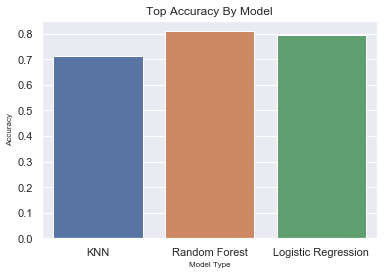

In [205]:
#accuracy by model for PC

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


#acc = pd.DataFrame(np.array(acc).reshape(1,3))
print(acc)

sns.set(style="darkgrid")
sns.barplot(["KNN","Random Forest","Logistic Regression"], acc)
plt.title('Top Accuracy By Model')
plt.ylabel('Accuracy', fontsize=8)
plt.xlabel('Model Type', fontsize=8)
plt.show()


**Poverty Class - Accuracy by Model and Class**

Understanding how our models are classifying each of our collective classes correctly helps us to understand a more full picture of where our models are falling short. In the chart below, we see the accuracies for each class in the Poverty class task separated by model approach. Overall we see a very clear trend reminiscent of our earlier heat maps where our edge cases of low and high poverty are better classified. This chart also reveals a more subtle pattern that our top models are better at predicting higher levels of poverty on average. For both our best Random Forest and best Logistic Regression models, we are seeing slightly better prediction accuracies for high poverty than low poverty and for above average poverty compared to below average poverty. 
 
The exception to this is KNN, this model predicts low poverty better than any other class in its model. However it still falls below the logistic regression and random forest models. 

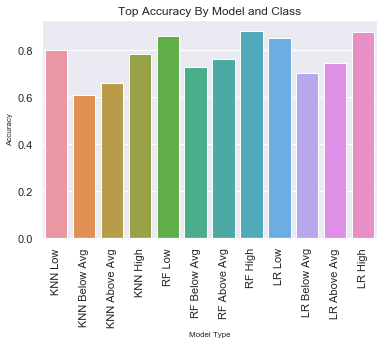

In [206]:
#accuracy by category for each top model
#accuracy by model for PC
catlist = ["KNN Low","KNN Below Avg","KNN Above Avg","KNN High",
           "RF Low","RF Below Avg","RF Above Avg","RF High",
           "LR Low","LR Below Avg","LR Above Avg","LR High",]

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt



sns.set(style="darkgrid")
sns.barplot(catlist, truecat)
plt.title('Top Accuracy By Model and Class')
plt.ylabel('Accuracy', fontsize=8)
plt.xlabel('Model Type', fontsize=8)
plt.xticks(rotation = 90)

plt.show()


### **2.4.2 Collar Classification Task**

As Collar Class was like Poverty Class a classification problem, we predicted it with the same three model approaches of KNN, Random Forest, and Logistic Regression. The major difference in our analysis here including predicting a different variable was that our Collar class was not a multinomial problem like our poverty class. This, makes our classification easier. However at the same time, our collar class variable is not deeply balanced like our Poverty Class Variable. As explored earlier, we see about a 70/30 split in favor of White Collar majority census tracts. These changes mean we expect to potentially see different techniques bringing success to this problem despite the same data set origins. 

**Collar Class - KNN**

Our most accurate KNN model for classifying Collar Class was obtained via a parameter grid search again looking at three fold cross validation of 180 models. Interestingly we found the same parameters run for our best Poverty Class KNN classification model resulted in our best Collar Class KNN classification model as well. With additional computing power, it may be worth exploring whether this result is due to our dataset and common features or a limitation in the computer power of our grid search, which for the KNN portion of our model took twelve hours of wall time overall to compute.  

In [234]:
print(KNN_ccBestParameters)


KNeighborsClassifier(algorithm='ball_tree', leaf_size=5, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='distance')


Strikingly, this best KNN classifier produces a strong 82% accuracy for classifying Collar class. This model also reports a 74% precision and 62% recall. As we can see in the heat map below, the imbalance in our dataset results in better classification ability for our White collar category than our blue collar category. Overall we see that this KNN model is predicting well, but is more likely to correctly predict White Collar class than Blue Collar class.

{'KNN_pc': [[14556, 3347, 200, 19], [4246, 11150, 2861, 84], [315, 4269, 11941, 1571], [17, 226, 3665, 14204]], 'KNN_cc': [[46658, 4642], [7957, 13414]], 'Random Forest_pc': [[15621, 2486, 11, 4], [2607, 13403, 2318, 13], [124, 2688, 13817, 1467], [20, 95, 1971, 16026]], 'Logistic Regression_pc': [[15468, 2613, 37, 4], [2762, 12886, 2663, 30], [155, 2628, 13540, 1773], [20, 143, 2069, 15880]], 'Logistic Regression_cc': [[46503, 4797], [8279, 13092]], 'Random Forest_cc': [[46831, 4469], [7312, 14059]]}


Text(0.5, 66.5, 'Actual')

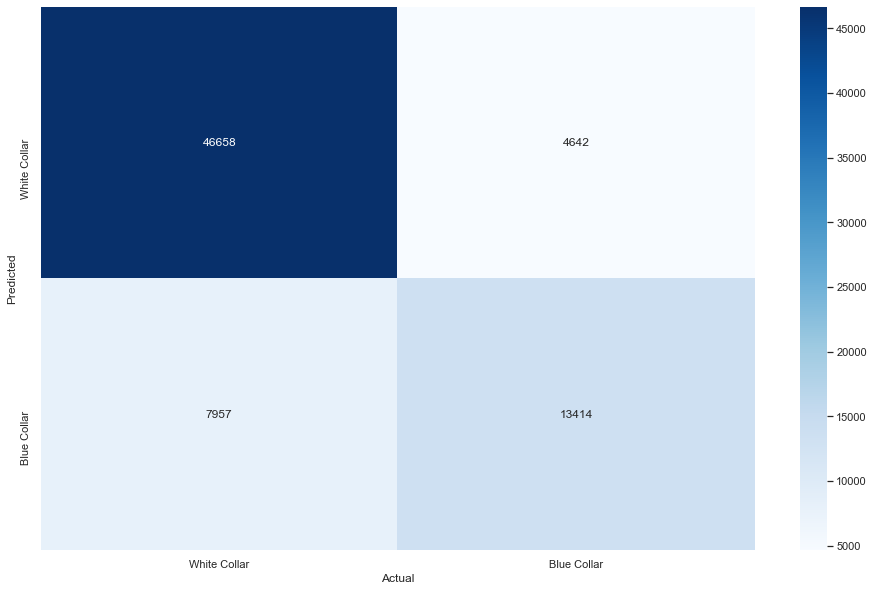

In [235]:
cm = cm_dict["KNN_cc"]
print(cm_dict)
plt.figure(figsize=(16,10))
sns.heatmap(cm, annot=True, fmt='g',cmap = 'Blues',xticklabels=['White Collar','Blue Collar'], yticklabels=['White Collar','Blue Collar']); 
plt.ylabel("Predicted")
plt.xlabel("Actual")


**Collar Class - Random Forest**

Below is our bets random forest model. Again we see our best set of parameters includes small minimum samples per leaf and small samples to split. We again use entropy as our best criterion and use bootstrapping to boost our accuracy. Notably our max tree depth also increased to 50, whereas the more complex prediction problem of Poverty Class stopped at 25. 

In [236]:
print(RF_ccBestParameters)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)


Below we can see the heat map of of confusion matrix for our best random forest model. It produced an accuracy of 83.79% a precision of 75.88% and recall of 65.79%. While there is a modest increase in accuracy, there is a three percent increase in recall. And we can see this result play out in the heat map below. Comparing this to the KNN heat map we can see that true classifications of White Collar remained stagnant but most the gains in accuracy came through the Blue Collar class which better balances our results in classification. 


Text(0.5, 66.5, 'Actual')

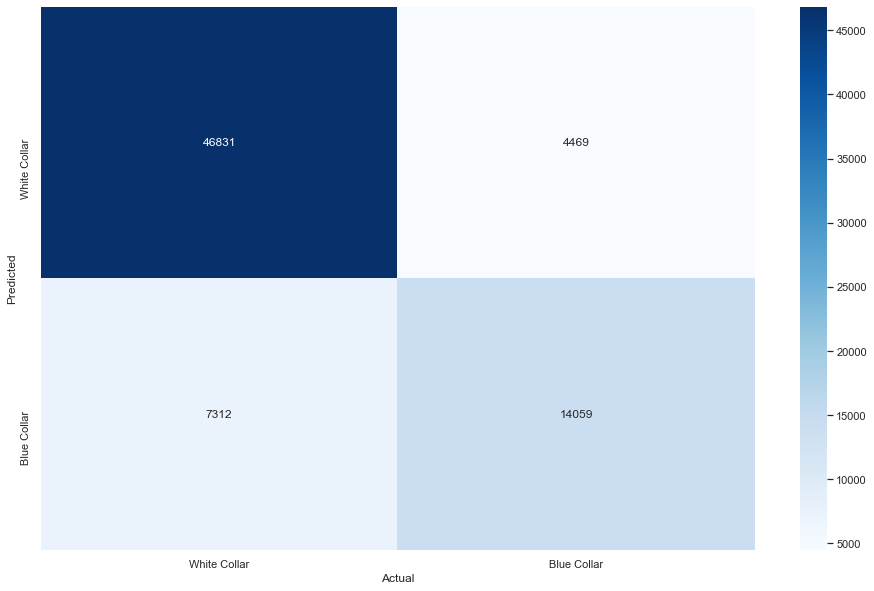

In [237]:
cm = cm_dict["Random Forest_cc"]
plt.figure(figsize=(16,10))
sns.heatmap(cm, annot=True, fmt='g',cmap = 'Blues',xticklabels=['White Collar','Blue Collar'], yticklabels=['White Collar','Blue Collar']); 
plt.ylabel("Predicted")
plt.xlabel("Actual")


**Collar Class - Logistic Regression**

Finally we can see our best set of parameters for logistic regression classification of our collar class. Our best parameters included using the ovr technique for our multiclass, as we did not need to use multinomial techniques we have the use of the lbfgs solver, which makes this model one of our fastest to predict in our project. 

In [238]:
print(LR_ccBestParameters)


LogisticRegression(C=0.1, class_weight='none', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=13, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Finally this model produces an accuracy of 82.01%, with a precision of 73.18% and a recall fo 61.26%.  Although not a bad model, this measures worse than our previous models. By examining the heat map below, we can see that the true predictions of white collar are again similar to previous methods. While on the other hand our ability to predict blue collar instances correctly has dropped significantly. This is indicative of the fact that our more successful models are better at predicting blue collar, while all have a similar success at predicting white collar. 

Text(0.5, 66.5, 'Actual')

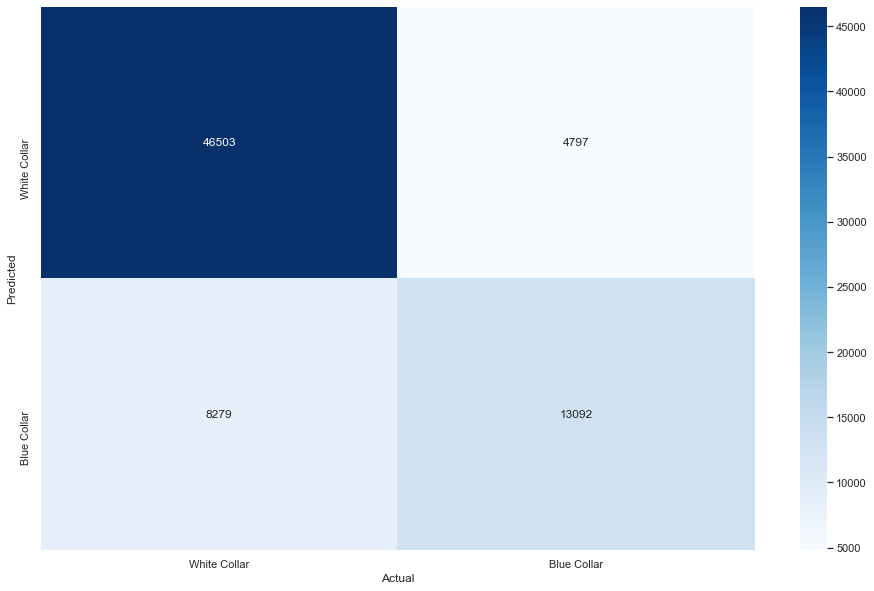

In [239]:
cm = cm_dict["Logistic Regression_cc"]
plt.figure(figsize=(16,10))
sns.heatmap(cm, annot=True, fmt='g',cmap = 'Blues',xticklabels=['White Collar','Blue Collar'], yticklabels=['White Collar','Blue Collar']); 
plt.ylabel("Predicted")
plt.xlabel("Actual")

**Collar Class - Accuracy by Model**

In [240]:
#Build Accuracy Lists for Plotting
cc_list = ["KNN_cc","Random Forest_cc","Logistic Regression_cc"]
acc = []
truecat = []
for j in cc_list:
    true = []
    print(j)
    a = cm_dict[j]

    
    for i in range(0,2):
        true.append(a[i][i])
        #print(a[i][i])
        print(a[i][i] / sum(a[i]))
        #print(truecat)
        truecat.append((a[i][i] / sum(a[i])))
        
    tempacc = sum(true)/X_cc.shape[0]
    acc.append(tempacc)
    

KNN_cc
0.9095126705653022
0.6276730148331852
Random Forest_cc
0.9128849902534113
0.6578541013522998
Logistic Regression_cc
0.9064912280701755
0.6126058677647279


Again we can see our top model’s accuracy measures. These are competing tightly with one another with random forest edging ahead with a slightly higher accuracy than the others. 

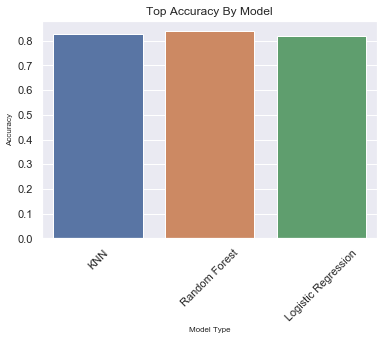

In [241]:
#accuracy by model for CC

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="darkgrid")
sns.barplot(["KNN","Random Forest","Logistic Regression"], acc)
plt.title('Top Accuracy By Model')
plt.ylabel('Accuracy', fontsize=8)
plt.xlabel('Model Type', fontsize=8)
plt.xticks(rotation = 45)
plt.show()


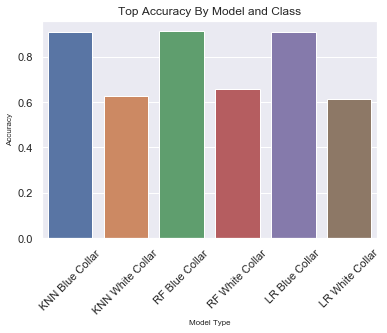

In [242]:
#acc by model by cat

#accuracy by category for each top model
#accuracy by model for PC
catlist = ["KNN Blue Collar","KNN White Collar",
           "RF Blue Collar","RF White Collar",
           "LR Blue Collar","LR White Collar",]

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
sns.barplot(catlist, truecat)
plt.title('Top Accuracy By Model and Class')
plt.ylabel('Accuracy', fontsize=8)
plt.xlabel('Model Type', fontsize=8)
plt.xticks(rotation = 45)

plt.show()


### **2.5 Modeling and Evaluation 5: Advantages of Each Model**

**Model Advatanges**

Overall it is not a shock to find that our best models for both collar classification and poverty classification were random forests. A decision tree is a powerful tool that can minutely predict given our dataset. A random forest offers a randomized nature that limits our chances of overfitting. 

Feature importance and explanation of the model itself is also quite important. A random forest is also a good model tool to explain our models in potential deployments as the path we used included an option to easily and quickly examine the feature importance of our resulting models. On the contrary KNN models and logistic regression models both offer drawbacks on interpretation. Logistic regression requires an interpretation of the weights designated for the regression model and for our multinomial problem this requires investigation for each class and can quickly become cumbersome. And KNN on the whole due to our scaled variables offers no easy interpretation of our features without some simulation to compare real results to potentially randomized results with different feature values.  While we offer strong predictions, the features that affect our chosen classification tasks and explaining these phenomena can be just as important and that explanation is best accomplished via our random forest method. 

Speed is  an issue for our top models as our random forests alone take the longest. However they stand in contrast to the fact our KNN grid search and parameter optimization required the most computing time by far. Rebuilding a KNN model with new parameters requires much more investment. However when it came to deploying the model itself, Logistic Regression consistently offers the best speeds of seconds compared to almost fifteen minutes to fit a model. In a production environment where new fits would be regularly required, the logistic regression models offer a strong advantage for time, with only a small disadvantage in accuracy.  

#### 2.5.1 Poverty Class ROC Curve/Confidence Intervals

**ROC Curve**

Graphing the Receiver operating characteristic (ROC) curve by model allows us to show the trade-off between sensitivity and specificity performance between them. Models that allow the curve to fit as closely as possible to the top-left corner of the graph indicate a better performance. For reference, the diagonal represents those models that would be as effective as random chance at selecting a false positive or true positive. The closer the curve comes to the 45-degree diagonal of the ROC graph, the less accurate the test. To compare the different models we will use the area under the curve (AUC) calculation. This metric is equivalent to the probability that a randomly chosen positive instance is ranked better than the randomly chosen negative instance. In addition, this metric is equivalent to the two sample Wilcoxon rank-sum statistic.

When performing ROC curves for Poverty Class we came across errors in Python due to Poverty Class being multi-class comparison. We built an ROC multi-class function that is defined at the top of section 2. We wanted to bring attention to this and see if you could not assist so that we know how to leverage this feature in the future. We utilized some of your code from the Classification Notebook.

In [253]:
%%time
ROCMulti(KNN_pcBestParameters, RF_pcBestParameters, LR_pcBestParameters, X_pc, y_pc, cv_object)


KNN Curve Generated
RF Curve Generated
LR Curve Generated


IndexError: too many indices for array

Since we could not get the ROC Curve to run we used confidence intervals to do our statistical comparison:

**95% Confidence Interval**

Since we have trained our models on the same exact sets of data, we have decided to 95% confidence intervals for whether or not the models have a statistically significant performance difference to support our ROC curve findings.

Reviewing the confidence interval for Poverty Class of KNN and Random Forest we see that it does not contain zero. Therefore we are 95% confident that there is sufficient statistical evidence proving that these models are not producing the same results. This is supporting our findings behind our evaluation metrics that clearly show the Random Forest model showing superior evaluation metric outcomes.

Reviewing the confidence interval for Poverty Class of KNN and Logistic Regression we see that it does not contain zero. Therefore we are 95% confident that there is sufficient statistical evidence proving that these models are not producing the same results. This additionally supports our findings that the Logistic Regression model would produce a more accurate and therefore desirable model.

Reviewing the confidence interval for Poverty Class of Logistic Regression and Random Forest we see that it does not contain zero. Therefore we are 95% confident that there is sufficient statistical evidence proving that these models are not producing the same results. Therefore we would revert back to our previous metric evaluations and see that this result supports our findings that the Random Forest model out performs the Logistic Regression model in accuracy.

In [229]:
%%time
ConfInt95(KNN_pcBestParameters, RF_pcBestParameters, LR_pcBestParameters, X_pc, y_pc, cv_object)

KNN Accuracy Generated
RF Accuracy Generated
LR Accuracy Generated
95% Confidence Intervals Between KNN and Random Forest:
Range of: 0.09417681358022607 0.09891248591896883
0.7135034098020324 0.8100480595516301
95% Confidence Intervals Between KNN and Logistic Regression:
Range of: 0.07791540268281029 0.08509315849637754
0.7135034098020324 0.7950076903916264
95% Confidence Intervals Between Random Forest and Logistic Regression:
Range of: -0.017309520360844276 -0.012771217959162806
0.8100480595516301 0.7950076903916264
CPU times: user 39min 51s, sys: 1min 2s, total: 40min 54s
Wall time: 43min 6s


#### 2.5.2 Collar Class ROC Curve/T-Tests/Confidence Intervals

**ROC Curve**

Based on the above characteristics defined by ROC graphs we can now compare the Collar Class models on the ROC graph below. The KNN, Random Forest, and Logistic Regression models for the Collar Class show tightly aligned curves with little variation between them regarding specificity and sensitivity. However, we can see that the ROC of the Random Forest model does slightly outperform the other two with the AUC reaching .79. Therefore, the Random Forest model would be our best performing model based on the ROC evaluation.

KNN Curve Generated
RF Curve Generated
LR Curve Generated


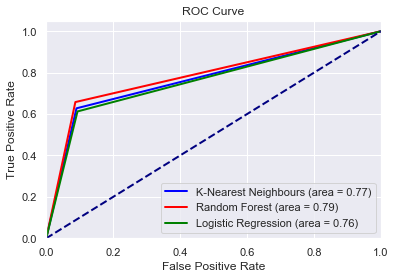

CPU times: user 16min 20s, sys: 7.18 s, total: 16min 28s
Wall time: 16min 26s


In [223]:
%%time
ROC(KNN_ccBestParameters, RF_ccBestParameters, LR_ccBestParameters, X_cc, y_cc, cv_object)


**95% Confidence Intervals**

With the confidence interval of our Collar Class KNN and Random Forest models not containing zero we can say that there is sufficient statistical evidence proving that these models are not producing the same results. Therefore, we would suggest choosing one model over the other. Due to this outcome, we would default to our other performance metrics and stick with our claim that the Random Forest model would be the best choice over the KNN model.

With the confidence interval for our Collar Class KNN and Logistic Regression models not containing zero we can say that there is sufficient statistical evidence proving that these models are not producing the same results. Therefore, we would suggest choosing one model over the other. Due to this outcome, we would default to our other performance metrics and stick with our claim that the Logistic Regression model would be the best choice over the KNN model.

With the confidence interval for our Collar Class Random Forest and Logistic Regression models not containing zero we can say that there is sufficient statistical evidence proving that these models are not producing the same results. Therefore, we would suggest choosing one model over the other. Due to this outcome, we would default to our other performance metrics and stick with our claim that the Random Forest model would be the best choice over the Logistic Regression model.

In [228]:
%%time
ConfInt95(KNN_ccBestParameters, RF_ccBestParameters, LR_ccBestParameters, X_cc, y_cc, cv_object)


KNN Accuracy Generated
RF Accuracy Generated
LR Accuracy Generated
95% Confidence Intervals Between KNN and Random Forest:
Range of: 0.008969036811845068 0.013543237559092746
0.8266296727109583 0.8378858098964272
95% Confidence Intervals Between KNN and Logistic Regression:
Range of: -0.009718955642371387 -0.0034089241837952254
0.8266296727109583 0.820065732797875
95% Confidence Intervals Between Random Forest and Logistic Regression:
Range of: -0.020138838762584602 -0.01550131543451982
0.8378858098964272 0.820065732797875
CPU times: user 16min 55s, sys: 9.36 s, total: 17min 4s
Wall time: 17min 5s


### **2.6 Modeling and Evaluation 6: Identify Important Attributes**

**Poverty Class**

Our top model for classifying poverty levels was a random forest model that produced 81% accuracy. First we are rerunning that model alone below, and producing a fit model we can use to identify features. Using that model we can see each of the features at hand with their relative feature importance for this model. But this list is easier to process visually so we will continue with a visual.

In [134]:
#Best Model for Poverty Class
#Poverty Class Random Forest Best Model

#%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics as mt 

modelType = 'Random Forest'
yhat = np.zeros(y_cc.shape) 
pc_clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

for train_idx, test_idx in cv_object.split(X_pc, y_pc):
    pc_clf.fit(X_pc[train_idx], y_pc[train_idx])
    yhat[test_idx] = pc_clf.predict(X_pc[test_idx])
    
acc = mt.accuracy_score(y_pc, yhat)
print(acc)
print(pc_clf)


0.81004802465908
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)


In [136]:
importances_pc = pc_clf.feature_importances_

for weight, name in zip(importances_pc, census_pc.columns): 
    print(name, 'has a feature importance of', round(weight,4))
    

Hispanic has a feature importance of 0.0193
White has a feature importance of 0.0336
Black has a feature importance of 0.0191
Native has a feature importance of 0.0067
Asian has a feature importance of 0.0134
Pacific has a feature importance of 0.0026
Income has a feature importance of 0.1899
CitizenPercent has a feature importance of 0.0263
ChildPoverty has a feature importance of 0.303
Professional has a feature importance of 0.047
Service has a feature importance of 0.0358
Office has a feature importance of 0.0147
Construction has a feature importance of 0.0165
Production has a feature importance of 0.0216
Drive has a feature importance of 0.0224
Carpool has a feature importance of 0.015
Transit has a feature importance of 0.013
Walk has a feature importance of 0.0216
OtherTransp has a feature importance of 0.0145
WorkAtHome has a feature importance of 0.0141
MeanCommute has a feature importance of 0.0178
PrivateWork has a feature importance of 0.0138
PublicWork has a feature import

Here we have the graphed values of feature importance for our Poverty Class model. These are the overall feature importances for classifying any class of poverty. Overall there is a clear picture that two values above all else influence our model, the first is Child Poverty levels and the second is Income. 

It is not difficult to imagine that Child Poverty levels are directly connected to general poverty. At first glance it can seem as though Child Poverty may be a substitute for poverty but we found through exploratory analysis that they were highly correlated but not connected in an exact relationship. However we know that child poverty is a highly important variable and gives us a lot of information about general poverty as it tells us a proportion of children in poverty which tracks to a similar relationship of adults in poverty. 
Income is our next strikingly important variable. It offers a lot of information about classifying poverty levels. Our income variable is a scaled version of the median income in each census tract. It is not difficult to imagine higher median incomes in certain census tracts indicates lower levels of poverty and vice versa. Of course this relationship is not perfect as a location can have some high income inequality with some higher incomes and some impoverished people, but overall our income variable is one of our most important features for classifying poverty class.  

Outside of Income and Child Poverty, most of our remaining variables have less significance in classifying poverty class. However, there is a secondary level of variables that show up as somewhat influential. We can see types of jobs like professional and service show as somewhat more influential features than our remaining features. In addition Employment percent and unemployment levels show up as decently influential features. The remaining features are mostly on similar levels with low impact on our classification. Overall we are seeing employment type variables are important for determining poverty pictures. 

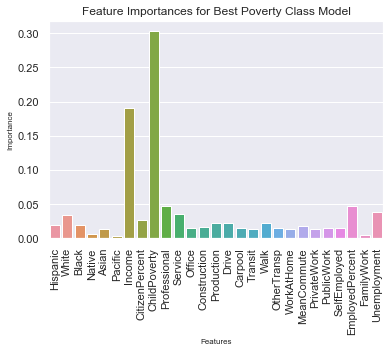

In [180]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(census_pc.columns, importances_pc)
plt.title('Feature Importances for Best Poverty Class Model')
plt.ylabel('Importance', fontsize=8)
plt.xlabel('Features', fontsize=8)
plt.xticks(rotation = 90)

plt.show()


**Collar Class**

For collar class, we again found our best model was an optimized parameter set for a random forest model with an accuracy of over 83%. Once again we can see our relative feature importance for our top model for predicting collar classifications after that model creation. They are more evenly distributed than the poverty class variables but again we find viewing them visually makes understanding feature importance easier.

In [181]:
#Best Model for Collar Class

#%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics as mt 

yhat = np.zeros(y_cc.shape) 
cc_clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)
for train_idx, test_idx in cv_object.split(X_cc, y_cc):
    cc_clf.fit(X_cc[train_idx], y_cc[train_idx])
    yhat[test_idx] = cc_clf.predict(X_cc[test_idx])
    
acc_cc = mt.accuracy_score(y_cc, yhat)
print(acc_cc)
print(cc_clf)


0.8378858141486976
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)


In [182]:
importances_cc = cc_clf.feature_importances_

for weight, name in zip(importances_cc, census_cc.columns): 
    print(name, 'has a feature importance of', round(weight,4))
    

Hispanic has a feature importance of 0.0528
White has a feature importance of 0.0509
Black has a feature importance of 0.0328
Native has a feature importance of 0.0155
Asian has a feature importance of 0.0469
Pacific has a feature importance of 0.006
Income has a feature importance of 0.1518
CitizenPercent has a feature importance of 0.0774
ChildPoverty has a feature importance of 0.0922
Drive has a feature importance of 0.0323
Carpool has a feature importance of 0.0521
Transit has a feature importance of 0.024
Walk has a feature importance of 0.0273
OtherTransp has a feature importance of 0.0238
WorkAtHome has a feature importance of 0.038
MeanCommute has a feature importance of 0.0357
PrivateWork has a feature importance of 0.0363
PublicWork has a feature importance of 0.0425
SelfEmployed has a feature importance of 0.0294
EmployedPercent has a feature importance of 0.0756
FamilyWork has a feature importance of 0.0092
Unemployment has a feature importance of 0.0476


Below we can see the feature importances for our collar class model in the char below.  Compared to our poverty classification task we do not have a few stand out variables that stand strongly above all others, but there is a more even distribution of importance in our features for identifying collar class. 

Most importantly here by a decent margin we have Income. Again like our poverty classification task, income is and important variable for classification. We know that white collar and blue collar type jobs have different income levels and are not surprised to see that income is a driving feature driving classification. It is important to note that this feature importance magnitude is about half that of Child Poverty in our previous task and we should note income is not a direct correlation of blue collar work as many blue collar type jobs can pay similar or better to white collar work and the concept of either has more to do with societal perceptions in addition to income rather than income only which is why this task can be quite different than looking at income alone. 

Next we see three features show up next in magnitude, Child Poverty, Citizen percent and employment percent. Child poverty would indicate a secondary relationship between collar classes and poverty levels that we also see in income’s relationship. Citizen percent may be an interesting metric to compare job collar type. Citizen percent may indicate different things in different areas, where in some census tracts where there is a high demand of technical jobs not filled locally, there may be a lower citizen percentage as immigrants work under visas and we would see these locations be heavy in white collar percentage. On the other hand, undocumented immigrants or otherwise non-citizens are more likely to take on lower paid work which often translates to difficult blue collar works. In either case, understanding citizen demographics can help paint a fuller picture of collar class at hand. Finally employed percent, along with unemployment indicate the employment level of census tracts provides us with information as to the class of work that is prevalent in these locations. We may be seeing this as production jobs tend to diminish with changes in automation and outsourcing and lower the employment ability of blue collar heavy locations. 

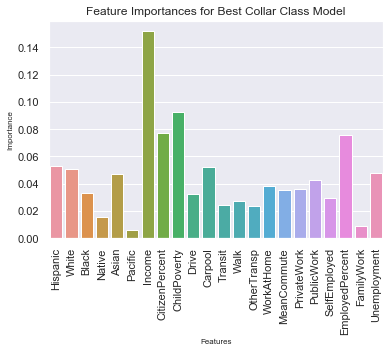

In [183]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(census_cc.columns, importances_cc)
plt.title('Feature Importances for Best Collar Class Model')
plt.ylabel('Importance', fontsize=8)
plt.xlabel('Features', fontsize=8)
plt.xticks(rotation = 90)

plt.show()


## **3. Deployment**

While there is interest and use in deploying either of our best models for classifying Poverty Class and Collar Class separately, a deployment that encompasses both models offers unique benefits. 

A socioeconomic class can be a nebulous and changing concept, but the understanding of a concept of socioeconomic class here informs us that behaviors and patterns on a macro level rely more than on an individual’s income or wealth status. In our case, a blue or white collar designation can inform social recognition or societal values placed upon that work which can therein affect the behaviors and self identification of our potential census tract population. Put another way, we understand that a business may know that while poverty level identification can be essential in both government functions, non profits, and for profit businesses. Understanding the work makeup of that census tract when otherwise not available can offer insight. 

With our random forest model offering 80% accuracy towards Poverty Class prediction and 82% accuracy towards Collar prediction, these models would be highly effective and useful for organizations across the country. With a high degree of accuracy, businesses can offer types of jobs in locations where they will be likely to get the best candidates by understanding whether the majority of jobs fall under white or blue collar status. Government organizations looking to direct relief dollars can find value in understanding which locations are in highest need by poverty status. A combined deployment can also offer use to several types of businesses, non profit that specializes in retraining people for new jobs may find a blue collar and high poverty location a high priority as blue collar jobs are more likely to be outsourced or automated while high poverty may indicate this shift is already happening and workers in the area may be underemployed. On the other hand, a specialty grocery store with high cost organic food for sale may find success not just in low poverty locations, but also find their product is higher valued in a location with white collar majority jobs. Additionally, this model could help the U.S.government welfare agency plan and budget by geographical region in order to assure those relief packages would be available to the right areas of the United States. Non-profit agencies could also benefit from being able to classify regional areas of the United States. They could plan and effectively execute: food relief, child poverty relief, school scholarship, and other resources to help lift those families up in their continued efforts to help.

We can measure the use of these models on various standards dependent on the user. A non profit offering job retraining in our hypothetical high poverty blue class locations can measure the effectiveness of their model on efficiency of use of resources to bring potential clients over into their job retraining program. If that non-profit was able to focus efforts in locations with more need, they would find that they could serve more people without spending as many resources informing and enticing them to come to the program. If a specialty grocery store may spend less on research on new locations by deploying these models and find more regular returns on investments of locations they open in low poverty white collar locations. 

These classification models can be built into the regular approach these organizations have in researching and reaching out into new territories. Deploying the models would require an in depth discussion with the organization itself and its goals and needs in understanding the socioeconomic dynamics at play in locations they themselves have no experience in. If the organizations themselves can offer data that is compatible with the model that could be another step to rebuild this model to better serve their needs. The model, being built on censu data, can be updated and tuned with each new census data update. But intermittent updates from other trusted sources updating our attributes can offer fresh perspective and real time tuning for our organizations. 

Overall, deployment of our classification models to predict Poverty Class and Collar Class are flexible based on public regular data and offer important insights to various organizations that are looking for insight on poverty levels and job makeup of locations of interest. These models are not everlasting as they only reflect reality as it is and when people move and change, so too should these models update and grow. 

## **4. Exceptional Work**

We would like the following considered for exceptional work:

### 4.1 Grid Search

#### 4.1.1 Poverty Class

In order to produce the most effective models we performed a grid search for *Poverty Class* by model. This took several hours and extreme computing power. Below we have produced a table of our time spent and number of fits by model by *Poverty Class*.

|  Model                 |  Fits    |   Ellapsed Time    |
|------------------------|----------|--------------------|
|  KNN                   | 540      |572.4 min: 9h 32min 29s|
|  Random Forest         |3000     |190.0min: 3h 11min 36s   |
|  Logistic Regression   |2016    |10.8min: 11min 2s  |

#### 4.1.2 Collar Class

In order to produce the most effective models we performed a grid search for *Collar Class* by model. This took several hours and extreme computing power. Below we have produced a table of our time spent and number of fits by model by *Collar Class*.

|  Model                 |  Fits    |   Ellapsed Time    |
|------------------------|----------|--------------------|
|  KNN                   | 540      |195.4min: 3h 15min 33s|
|  Random Forest         | 3000   |143.5min: 2h 24min 40s |
|  Logistic Regression   |  2016  |10.8min: 11min 30s |

### 4.2 Advanced Pre-Processing

We completed advanced scaling of our data set using the StandardScaler() SK Learn method when we do our train/test splitting in [Section 2.2: Training/Test Split Method](https://colab.research.google.com/drive/1fBFJCL0AUtZc_Zygo4NwYrBjoWFGUErf#scrollTo=ywYgds92SjOQ).

When creating our CV object we had to reduce from 10 to 3 fold variations. This was necessary as we can across an issue of computing time and consequently computing power. We learned in the MiniLab that when running our grid search for tuning the hyperparameters of our model that it would result in hours, possibly days, to completion. Therefore we reduced these objects to 3 fold however maintained a 10 fold train test split of those hypertuned parameters. While this does mean our model could be improved on further, we feel that the 3 fold CV object has been sufficient for the needs of our Lab 2.

### 4.3 Feature Engineering

#### 4.3.1 Poverty Class

Our first task, Poverty Class has been created off of the continuous poverty percentage variables in our original data set. We created four different poverty classes: Low Poverty, Below Average Poverty, Above Average Poverty, and High Poverty. The bin thresholds used to create these four classes are the quartiles of the Poverty percentage variable.

Based on these thresholds:
```
Low Poverty is between 0 and  7.2%

Below Average Poverty is between 7.2 and 13.4%

Above Average Poverty is between 13.4 and 23.1%

High Poverty is between 23.1 and 100%
```

#### 4.3.2 Collar Class

Our second task, Collar Class, has been created off of our aggregate job function variables: Office, Professional, Production, Construction, and Service. Below are the classification groups we created: White Collar and Blue Collar. We divied up the job function types between these two categories for a binary classification evaluation of the job function variables.

```
White Collar = Office + Professional

Blue Collar = Production + Construction + Service
```

#### 4.3.3 Aggregate To Percentage Transformations

Since, the majority of our variables represent percentages of a population from 0 to 100%, that fit a certain category, we want as many variables to be displayed this way. We have two variables: Citizen and Employed that are not percentages, but rather aggregate counts of a population. Therefore, we created percentage variables for these two attributes called CitizenPercent and EmployedPercent.

```
CitizenPercent: Depicts the percentage (0 - 100%) of U.S. citizens in that geographical line item. [census_pc, census_cc]

EmployedPercent: Depicts the percentage (0 - 100%) of employed persons in that geographical line item. [census_pc, census_cc]
```

### 4.4 Advantages Of Each Model

We performed multiple statistical comparison methods for the [2.5 Advantages of Each Model](https://colab.research.google.com/drive/1fBFJCL0AUtZc_Zygo4NwYrBjoWFGUErf#scrollTo=dXH84e3lSZ1E) section. Here we were able to support our findings of the Random Forest model being the top performing classifciation model for both Classes: *Poverty* and *Collar*. Submitting these efforts to be considered towards our Exceptional Work performace.

```
ROC Curves
95% Confidence Intervals
```
